# Library import 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import networkx as nx
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error
from model import *
from utils import *
import matplotlib as mpl

plt.style.use('default')

In [8]:
# 멀티 인덱스로 가져야되나?
# sheet도 여러개라서 다시 사용해야됨 Days2부터 있음.
path = '../data/'
im_path = '../data/Figure/'

plaque = pd.read_excel(path + 'plaque_processed.xlsx')
plaque.fillna(method='ffill', inplace=True)
df = plaque.groupby(['Virus','Day','SNPs'])

# 그룹별 데이터프레임을 생성 후 dict에 저장
output = dict(list(df))
output.keys()

day_list = ['Day2', 'Day3', 'Day4', 'Day5', 'Day6']
snp_list = ['2NPC1', 'D502E','D508N',  'P424A', 'S425L','Y420S']

def S_type(virus:str,Day : str):
    temp = pd.DataFrame()
    for i in snp_list:
        temp = pd.concat([temp, output[(virus, Day, i)]])
    return temp

def D_type(virus, snps):
    temp = pd.DataFrame()
    for i in day_list:
        temp = pd.concat([temp, output[(virus,i , snps)]])
    return temp

# function define

In [45]:
for i in snp_list:
    print('Zaire',i,sum(map(len, raw_radi('Zaire', i)[1:])))
    print('Angola',i,sum(map(len, raw_radi('Angola', i)[1:])))

Zaire 2NPC1 51
Angola 2NPC1 45
Zaire D502E 44
Angola D502E 39
Zaire D508N 52
Angola D508N 46
Zaire P424A 41
Angola P424A 39
Zaire S425L 33
Angola S425L 27
Zaire Y420S 76
Angola Y420S 34


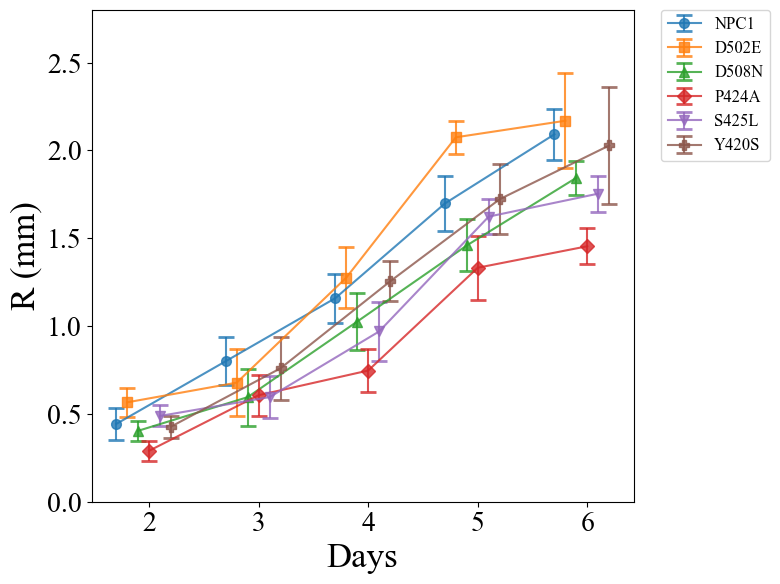

In [46]:
mpl.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 12,
    'axes.labelsize': 15,
    'axes.titlesize': 15,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
})

# 색상 및 마커 스타일
colors = plt.cm.tab10.colors
markers = ['o', 's', '^', 'D', 'v', 'P']

# 데이터 준비
v_type = 'Zaire'
snp_list = ['2NPC1', 'D502E', 'D508N', 'P424A', 'S425L', 'Y420S']

plt.figure(figsize=(8, 6))
for idx, s_type in enumerate(snp_list):
    df = D_type(v_type, s_type)
    r_list, sd_list = plaque_f(df)

    # X축 jitter를 적용해 겹침 완화
    x_jittered = np.arange(len(r_list)) + 0.1 * (idx - len(snp_list)/2)

    if s_type=='2NPC1':
        s_type= 'NPC1'
    plt.errorbar(
        x_jittered, r_list, yerr=sd_list,
        fmt=markers[idx % len(markers)] + '-',  # 다양한 마커 적용
        color=colors[idx % len(colors)],
        alpha=0.8, capsize=6, markersize=7,
        capthick=2, elinewidth=1.5, label=s_type
    )

# 축 설정
plt.xlabel('Days', fontsize=25)
plt.ylabel(r'R (mm)', fontsize=25)
plt.xticks(np.arange(5), labels=[2, 3, 4, 5, 6])
plt.tick_params('both', labelsize=20)
plt.ylim(0, 2.8)

# 범례는 바깥 우측에 배치
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()


In [56]:
interval = 1441 # 근데 그거랑 상관없이 몇개로 나눌거냐는 똑같잖아?
ps = None # 기본값은 4일로 잡아놓고 필요에 따라서 더 늘려서 할 수 있도록 해보자
result = []
label_pos = []
if ps is not None:
    for i in np.arange(ps):
        if i == ps-1:
            temp = np.linspace(i,i+1, interval)
            result = np.concatenate((result,temp))
        else:
            temp = np.linspace(i,i+1, interval)[:-1]
            result = np.concatenate((result,temp))
    arr = result
    for i in range(1,ps+1):
        label_pos.append(interval*i-i)
else:
    a = np.linspace(0,1,interval)[:-1]
    b = np.linspace(1,2,interval)[:-1]
    c = np.linspace(2,3,interval)[:-1]
    d = np.linspace(3,4,interval)
    arr = np.concatenate((a, b,c,d))
    for i in range(1,5):
        label_pos.append(interval*i-i)

In [66]:

# 초단위로 바뀌었음
interval = 1441 # 근데 그거랑 상관없이 몇개로 나눌거냐는 똑같잖아?
ps = None # 기본값은 4일로 잡아놓고 필요에 따라서 더 늘려서 할 수 있도록 해보자
result = []
label_pos = []
if ps is not None:
    for i in np.arange(ps):
        if i == ps-1:
            temp = np.linspace(i,i+1, interval)
            result = np.concatenate((result,temp))
        else:
            temp = np.linspace(i,i+1, interval)[:-1]
            result = np.concatenate((result,temp))
    arr = result
    for i in range(1,ps+1):
        label_pos.append(interval*i-i)
else:
    a = np.linspace(0,1,interval)[:-1]
    b = np.linspace(1,2,interval)[:-1]
    c = np.linspace(2,3,interval)[:-1]
    d = np.linspace(3,4,interval)
    arr = np.concatenate((a, b,c,d))
    for i in range(1,5):
        label_pos.append(interval*i-i)

v_type = 'Zaire'
s_type = '2NPC1'

df = D_type(v_type, s_type)
r_list, sd_list = plaque_f(df)

beta =0.05
H,pos,_ = make_lattice()
S,E,I,D = set_initial(H,r_list[0],beta,interval)

# beta/sigma & gamma/sigma
alpha = 2 * (24/(interval-1))
gamma = 2* 4.5/27 * (24/(interval-1))

if ps is not None:
    num_steps = interval*ps - (ps-1)
else:
    num_steps = interval*4-3



exposed_list = []
infected_list = []
dead_list = []

# 이거 순서도 생각해야됨
for t in range(num_steps):

    # S -> E process
    new_exposed = set()
    new_recoveries = set()

    for i in I:
        # s의 이웃들에 대해서
        # 6n 보다
        # link based로 물어보는게 더 좋다
        # S I 연결되어 있는 link만 확인하자

        for neighbor in H.neighbors(i):
            # neighbor에서 E 혹은 I가 있으면 감염시켜라 그러면 E 빼야되는거 아닌가? 이건 고민좀 해봐야될 듯?
            # if neighbor in I or neighbor in E:
            if neighbor in S:
                #if np.random.choice([0,1], 1, p = [1-beta, beta]):
                if np.random.uniform() < beta:
                    new_exposed.add(neighbor)
                    # break 들어가는 이유 그 다음 스텝 추가 했으면 그건 다시 감염 안시켜서 한번에 하나만 감염시킬 수 있게 해주기 위해서 들어감
                    # 한step에 빨간 녀석은 한명만 감염시킬 수 있음.
                    # break 없앰

    # E -> I process
    new_infections = set()

    for e in E:
        # if np.random.choice([0,1], 1, p = [1-alpha, alpha]):
        if np.random.uniform() < alpha: 
            new_infections.add(e)
    # I -> D processs
    for ii in I:
        if np.random.uniform() < gamma:
            new_recoveries.add(ii)

    I -= new_recoveries
    D |= new_recoveries        
    E -= new_infections
    I |= new_infections
    S -= new_exposed
    E |= new_exposed

    # 각 step에서의 갯수 기록

    exposed_list.append(len(E))
    infected_list.append(len(I))
    dead_list.append(len(D))

    
    # Draw Figures
    if t in label_pos:
        
        fig, ax = plt.subplots(figsize=(20,20))
        # circle =plt.Circle( center_pos ,radius_cal(len(D))*125 ,fill = False ,linewidth=10, linestyle='--',color='springgreen')
        # xy축 비율 동일하게 해주는코드
        ax.set_aspect('equal')
        # 상하좌우 테두리 없애주는 코드
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

        fig.patch.set_visible(False)
        # ax.add_patch(circle)
        # nx.draw_networkx_nodes(H, pos, nodelist=S, node_size=3, node_color='dodgerblue',node_shape='h')  
        nx.draw_networkx_nodes(H, pos, nodelist=I, node_size=3, node_color='red',node_shape='h')
        # nx.draw_networkx_nodes(H, pos, nodelist=I_n, node_size=3, node_color='red',node_shape='h') 
        nx.draw_networkx_nodes(H, pos, nodelist=E, node_size=3, node_color='gold',node_shape='h')
        # nx.draw_networkx_nodes(H, pos, nodelist=E_n, node_size=3, node_color='gold',node_shape='h')
        nx.draw_networkx_nodes(H, pos, nodelist=D, node_size=3, node_color='#131313',node_shape='h')

In [14]:
import cv2
from glob import glob
import natsort

im_filepa = glob('../result/cell_figure/merge/*.jpg')
im_ls = natsort.natsorted(im_filepa)

frame = cv2.imread(im_ls[0])
height, width, layers = frame.shape

video = cv2.VideoWriter('../result/video/merge_video.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 60, (width, height))


# 이미지들을 비디오에 추가
for image_file in im_ls:
    video.write(cv2.imread(image_file))

# 비디오 종료
video.release()

# Multi seed case

In [8]:

def make_lattice(t_radius=394, h=950, lattice_type ='triangle'):
    """
    make triangular lattice with circle shape

    Parameters
    -----------
    t_radius : total radius 
    h : height h+1만큼의 row 개수를 가진다. 
    w : width (w+1)//2만큼 columns 개수를 가진다.
    Return
    -----------
    Triangular lattice : H and position : pos
    Example
    -----------
    H, pos = make_lattice()
    """
    # 실제거리면 별로 안좋은데 노드로 세는게 더 좋을 수도
    w = 2*h
    G = None  # 변수 G를 먼저 정의해둡니다.
    if lattice_type == 'triangle':
        G = nx.triangular_lattice_graph(m=h, n=w, periodic=False, with_positions=True, create_using=None)
        pos = nx.get_node_attributes(G, 'pos')

        # 중심을 어디서 잡을거냐
        center = (((w+1)//2)//2,(h+1)//2)

    elif lattice_type == 'rectangle':
        G = nx.grid_2d_graph(h,h, periodic=False)
        pos = {(i,j):(i,j) for i in range(h) for j in range(w)}
        nx.set_node_attributes(G,pos,'pos')
        center = (h//2,h//2)
    
    center_pos = G.nodes[center]['pos']

    circle_nodes = set()

    # 원형의 network를 구현하기 위해서 이렇게 진행하였음
    for node, poss in pos.items():
        # center pos와의 거리가 원형으로 일정 이내로 들어오도록 해주었다.
        distance = math.sqrt((poss[0] - center_pos[0])**2 + (poss[1] - center_pos[1])**2)
        if distance <= t_radius:
            circle_nodes |= {node}

    H = nx.subgraph(G, circle_nodes)
    pos = nx.get_node_attributes(H, 'pos')

    return H, pos, center_pos

def set_initial_multi_seed_with_tracking(H, i_radius, interval, beta=0.5, h=394, seed_count=3):
    """
    Multi-seed 기반 감염 확산 초기화 및 시뮬레이션, 각 시드별 감염 추적.

    Args:
        H (graph): 네트워크 그래프.
        i_radius (int): 감염 전파의 목표 반경.
        interval (int): 시간 간격.
        beta (float): 감염 확률.
        h (int): 그래프 높이.
        seed_count (int): 초기 감염자 수.
    
    Returns:
        S, E, I, D: 각각 감염 상태를 나타내는 집합들.
        seed_infected: 초기 시드별로 감염된 노드 집합을 추적한 딕셔너리.
    """
    w = 2 * h

    # 초기 시드 설정 (랜덤 선택)
    all_nodes = list(H.nodes())  # H.nodes()를 리스트로 변환
    initial_seeds = random.sample(all_nodes, seed_count)
    # initial_seeds = [(241,21),(425,56),(134,500)]

    infected = set(initial_seeds)
    S = set(H.nodes()) - infected
    E = set()
    I = infected
    D = set()

    # 각 시드별 감염된 노드를 추적하기 위한 딕셔너리
    seed_infected = {seed: set([seed]) for seed in initial_seeds}

    # 감염 전이 확률 파라미터
    alpha = 2 * (24 / (interval - 1))  # 잠복기 -> I로 전환
    gamma = 2 * 4.5 / 27 * (24 / (interval - 1))  # I에서 D로 전환

    # 반경 i_radius 내에서 감염 확산 반복
    while radius_cal(len(D)) < i_radius:
        new_exposed = {}

        # 모든 시드에서 감염 전파
        for seed in seed_infected:
            new_exposed[seed] = set()

        for i in I:
            for neighbor in H.neighbors(i):
                if neighbor in S and np.random.uniform() < beta:
                    # 어느 시드로부터 감염되었는지 추적
                    for seed in seed_infected:
                        if i in seed_infected[seed]:
                            new_exposed[seed].add(neighbor)
                            break

        # 노출된 노드를 전체 E에 추가
        for seed, exposed in new_exposed.items():
            seed_infected[seed].update(exposed)

        # E -> I 전이
        new_infections = set()
        for e in E:
            if np.random.uniform() < alpha:
                new_infections.add(e)

        # I -> D 전이
        new_recoveries = set()
        for ii in I:
            if np.random.uniform() < gamma:
                new_recoveries.add(ii)

        # 상태 업데이트
        I -= new_recoveries
        D |= new_recoveries

        E -= new_infections
        I |= new_infections

        for seed, exposed in new_exposed.items():
            S -= exposed
            E |= exposed

    return S, E, I, D, initial_seeds, seed_infected

from model import *
from utils import *
import matplotlib.pyplot as plt

interval = 481 # 근데 그거랑 상관없이 몇개로 나눌거냐는 똑같잖아?
ps = None # 기본값은 4일로 잡아놓고 필요에 따라서 더 늘려서 할 수 있도록 해보자
result = []
label_pos = []
if ps is not None:
    for i in np.arange(ps):
        if i == ps-1:
            temp = np.linspace(i,i+1, interval)
            result = np.concatenate((result,temp))
        else:
            temp = np.linspace(i,i+1, interval)[:-1]
            result = np.concatenate((result,temp))
    arr = result
    for i in range(1,ps+1):
        label_pos.append(interval*i-i)
else:
    a = np.linspace(0,1,interval)[:-1]
    b = np.linspace(1,2,interval)[:-1]
    c = np.linspace(2,3,interval)[:-1]
    d = np.linspace(3,4,interval)
    arr = np.concatenate((a, b,c,d))
    for i in range(1,5):
        label_pos.append(interval*i-i)

v_type = 'Zaire'
s_type = '2NPC1'

df = D_type(v_type, s_type)
r_list, sd_list = plaque_f(df)
beta = 0.25
H, pos = make_lattice()
S,E,I,D,initial_seeds, seed_infected = set_initial_multi_seed_with_tracking(H,r_list[0]*0.1,interval)

In [10]:


alpha = 1 * (24/(interval-1))# 초단위로 바꿔보자
# I -> D parameter 회복률 -> 몇일 지나면 더이상 바이러스 못 시키는지로 바꿔야됨
gamma = 1* 4.5/27 * (24/(interval-1)) # 27시간으로 가정했으면
num_steps = interval*4-3


seed_dead = {seed: set() for seed in initial_seeds}  # 각 시드별 죽은 세포 추적

for t in range(num_steps):
    new_exposed = {seed: set() for seed in initial_seeds}
    new_recoveries = set()

    for i in I:
        for neighbor in H.neighbors(i):
            if neighbor in S and np.random.uniform() < beta:
                # 감염된 노드를 초기 시드 중 하나로 추적
                for seed in seed_infected:
                    if i in seed_infected[seed]:
                        new_exposed[seed].add(neighbor)
                        break

    # E -> I process
    new_infections = set()
    for e in E:
        if np.random.uniform() < alpha:
            new_infections.add(e)

    # I -> D process
    for ii in I:
        if np.random.uniform() < gamma:
            new_recoveries.add(ii)
            # 죽은 노드를 추적된 시드에 추가
            for seed in seed_infected:
                if ii in seed_infected[seed]:
                    seed_dead[seed].add(ii)
                    break

    # 상태 업데이트
    I -= new_recoveries
    D |= new_recoveries
    E -= new_infections
    I |= new_infections
    S -= set.union(*new_exposed.values())  # 모든 노드에서 새로 노출된 노드 제거
    E |= set.union(*new_exposed.values())  # 모든 노드에서 새로 노출된 노드 추가

    # 시드별 감염 추적 업데이트
    for seed in seed_infected:
        seed_infected[seed].update(new_exposed[seed])

    # 각 시드별 죽은 세포 수 기반으로 반지름 계산
    radii = {seed: radius_cal(len(seed_dead[seed])) / 0.008 for seed in seed_dead}

    # 시각화
    fig, ax = plt.subplots(figsize=(20, 20))

    for seed in initial_seeds:
        circle = plt.Circle(
            H.nodes[seed]['pos'],
            radii[seed],  # 해당 시드의 반지름
            fill=False,
            linewidth=3,
            linestyle='--',
            color='springgreen'
        )
        ax.add_patch(circle)
        circle.set_zorder(4)  # 원이 노드 위에 그려지도록 설정

    # xy축 비율 동일하게
    ax.set_aspect('equal')

    # 상하좌우 테두리 없애기
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    fig.patch.set_visible(False)

    # 노드 상태별 시각화
    nx.draw_networkx_nodes(H, pos, nodelist=S, node_size=0.1, node_color='dodgerblue', node_shape='h')
    nx.draw_networkx_nodes(H, pos, nodelist=I, node_size=0.1, node_color='red', node_shape='h')
    nx.draw_networkx_nodes(H, pos, nodelist=E, node_size=0.1, node_color='gold', node_shape='h')
    nx.draw_networkx_nodes(H, pos, nodelist=D, node_size=0.1, node_color='#131313', node_shape='h')

    plt.savefig(f'../result/cell_figure/merge_multi/merge_multi_{t}.jpg', dpi=200)
    plt.close()

In [11]:
import cv2
import natsort
from glob import glob

im_filepa = glob('../result/cell_figure/merge_multi/*.jpg')
im_ls = natsort.natsorted(im_filepa)

frame = cv2.imread(im_ls[0])
height, width, layers = frame.shape

video = cv2.VideoWriter('../result/video/multi_merge_video2.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 60, (width, height))


# 이미지들을 비디오에 추가
for image_file in im_ls:
    video.write(cv2.imread(image_file))

# 비디오 종료
video.release()

# Day 별로 Cell Configuration

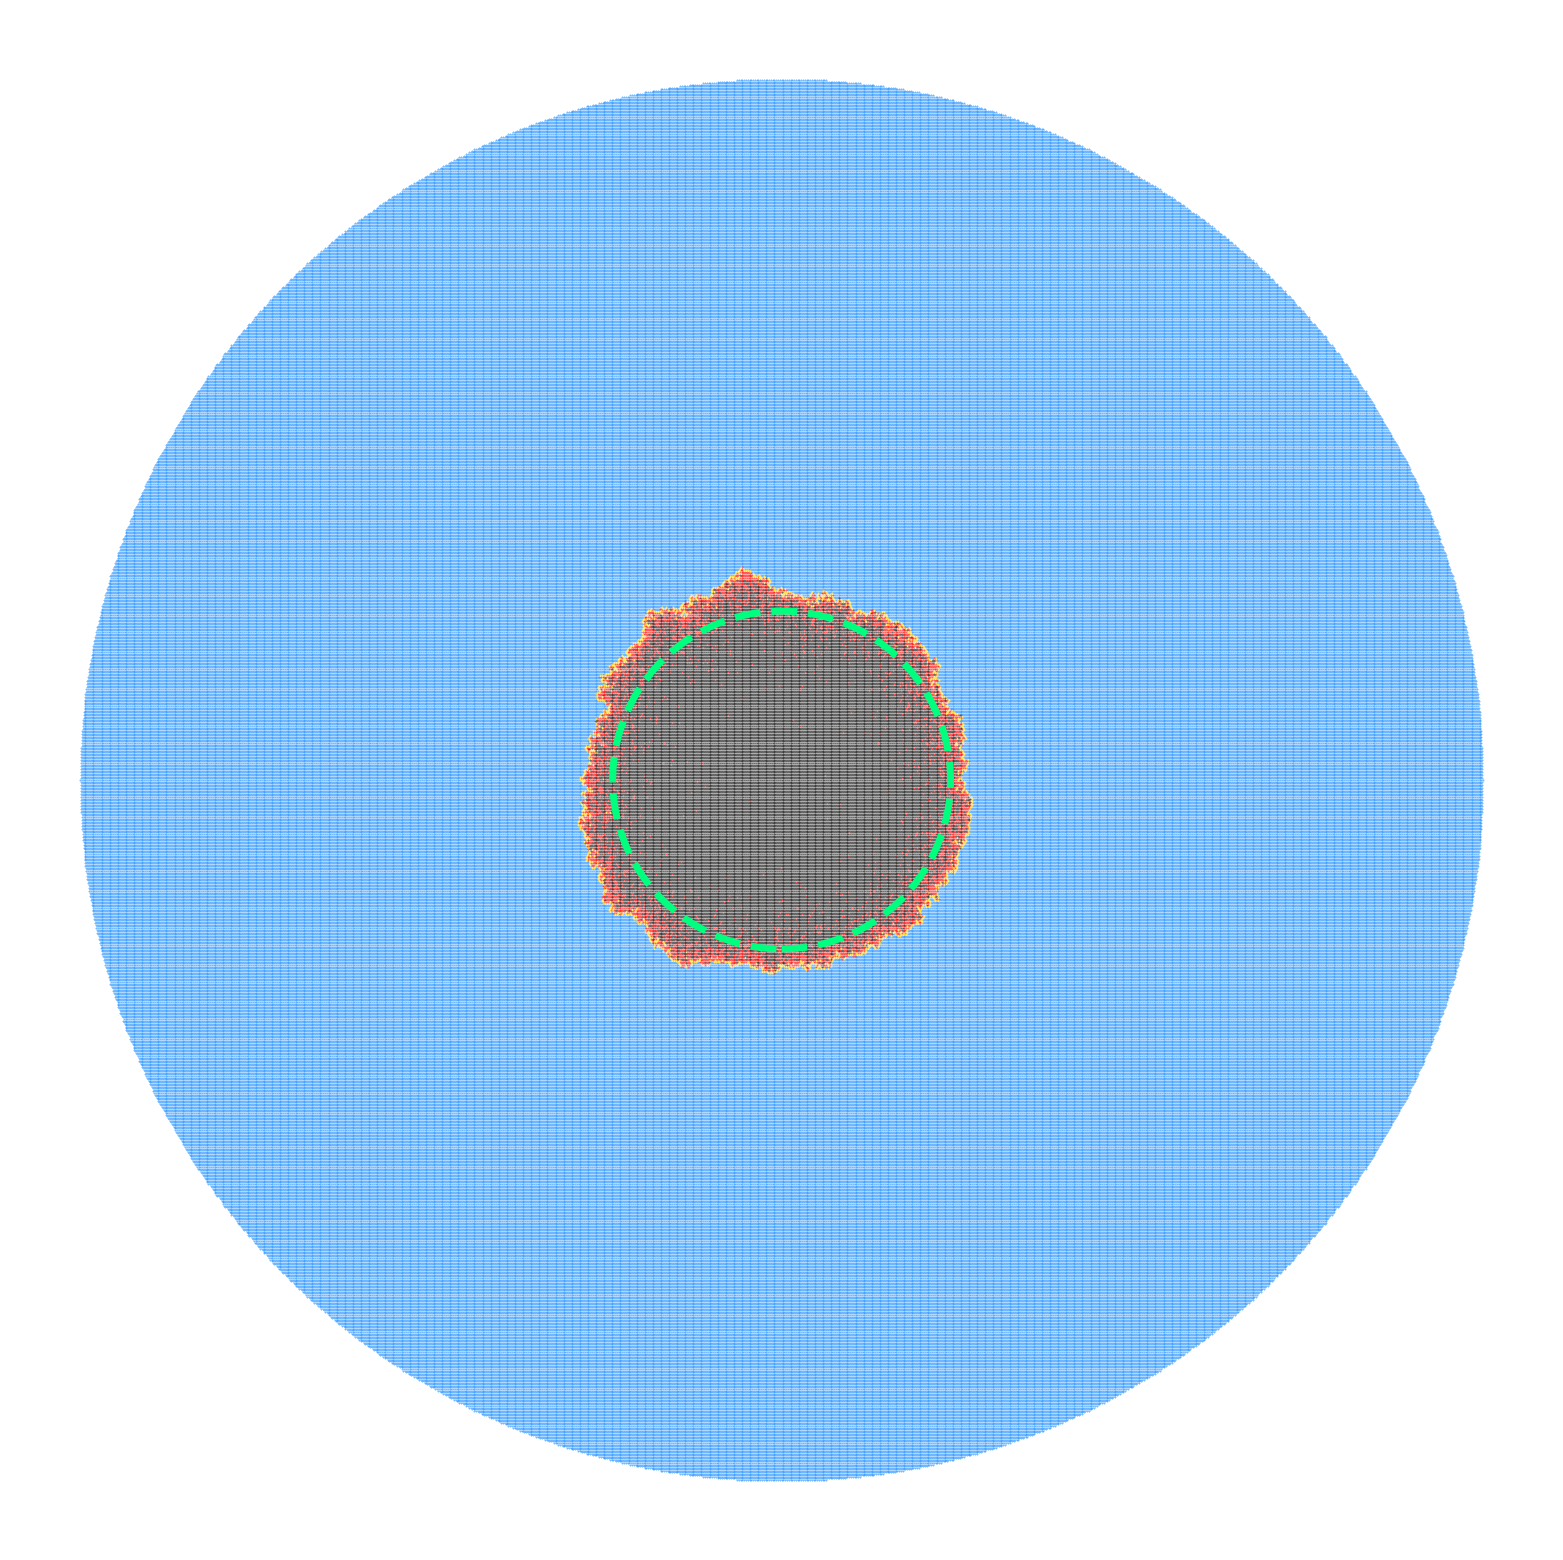

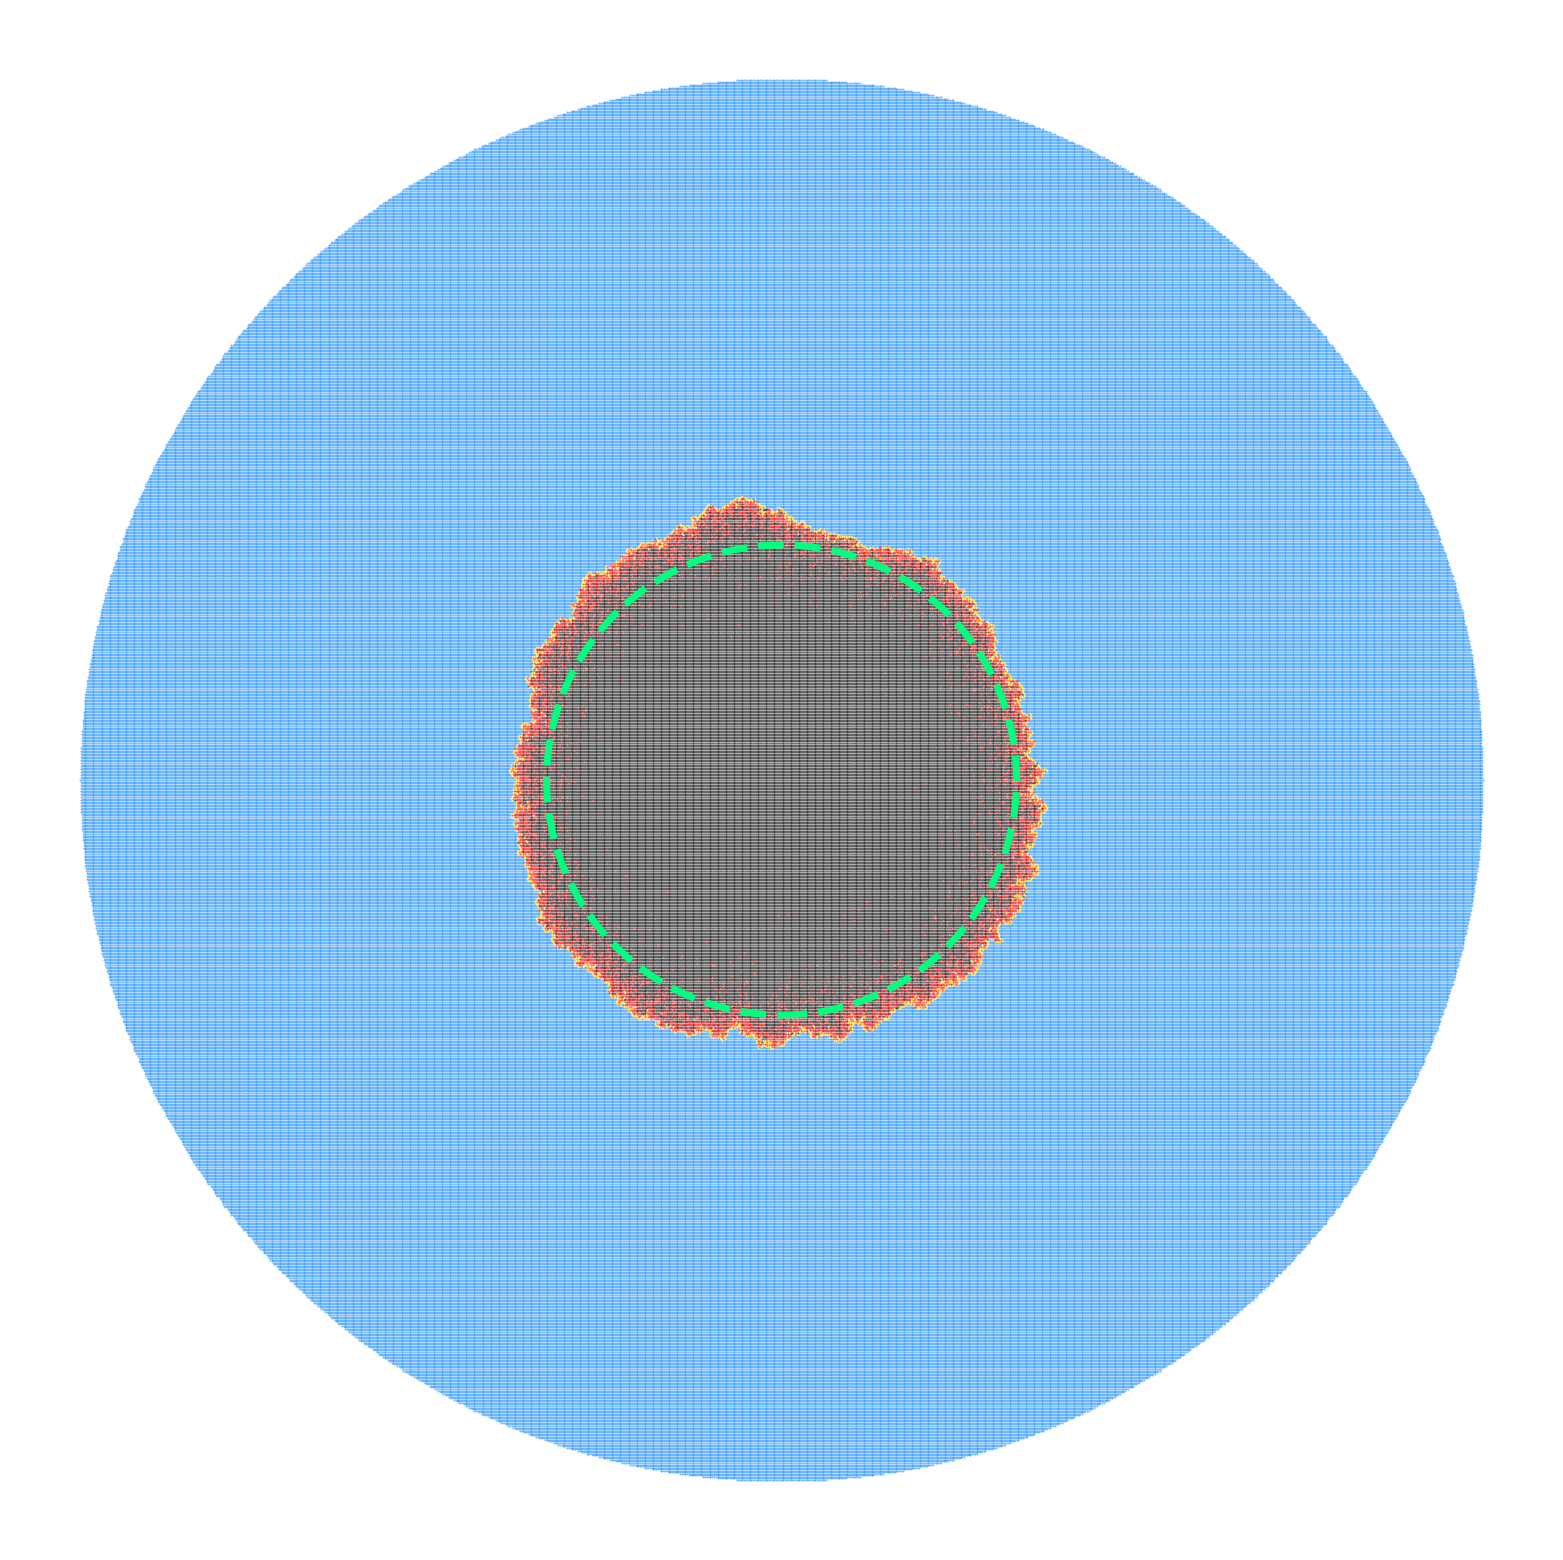

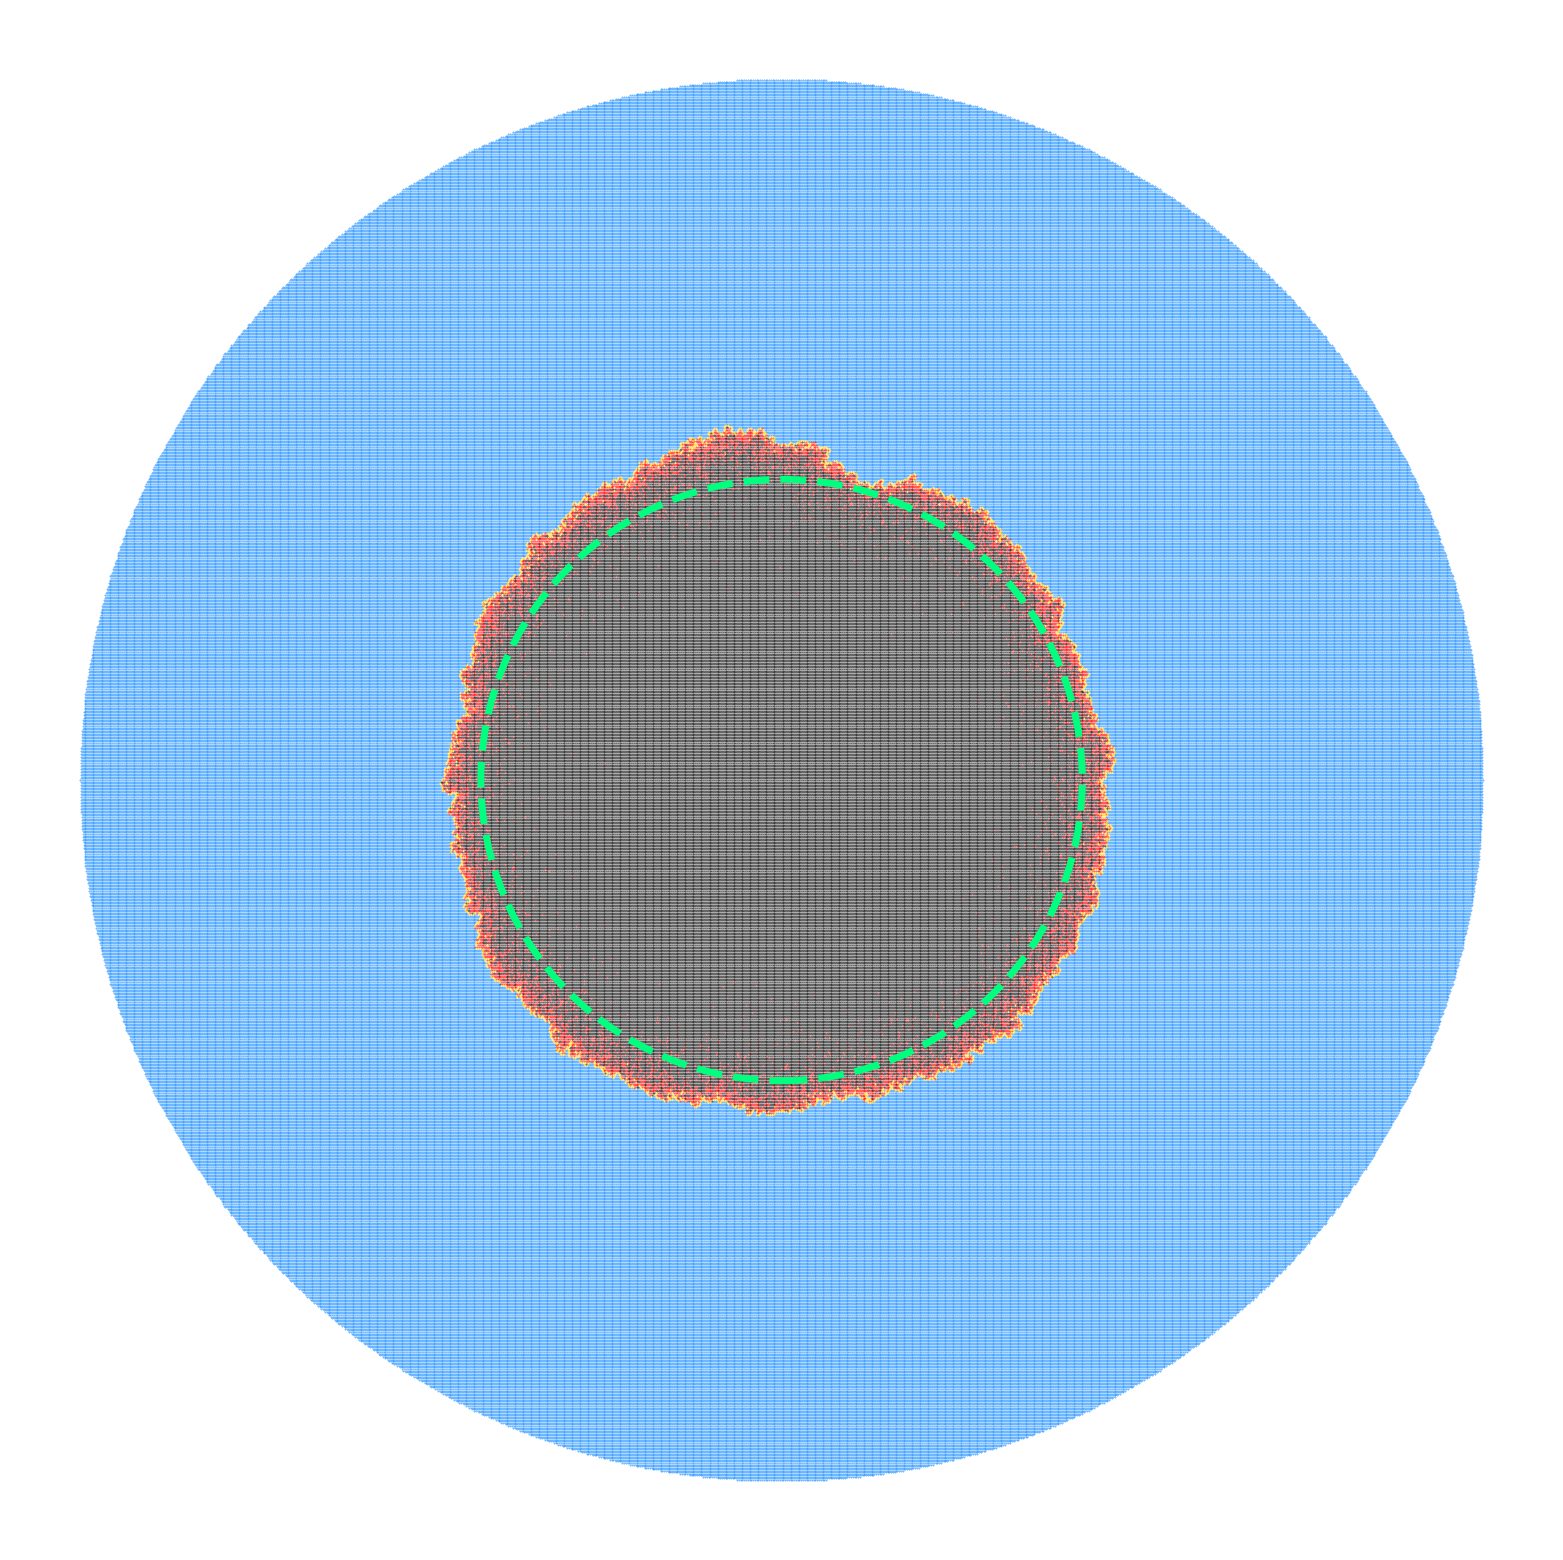

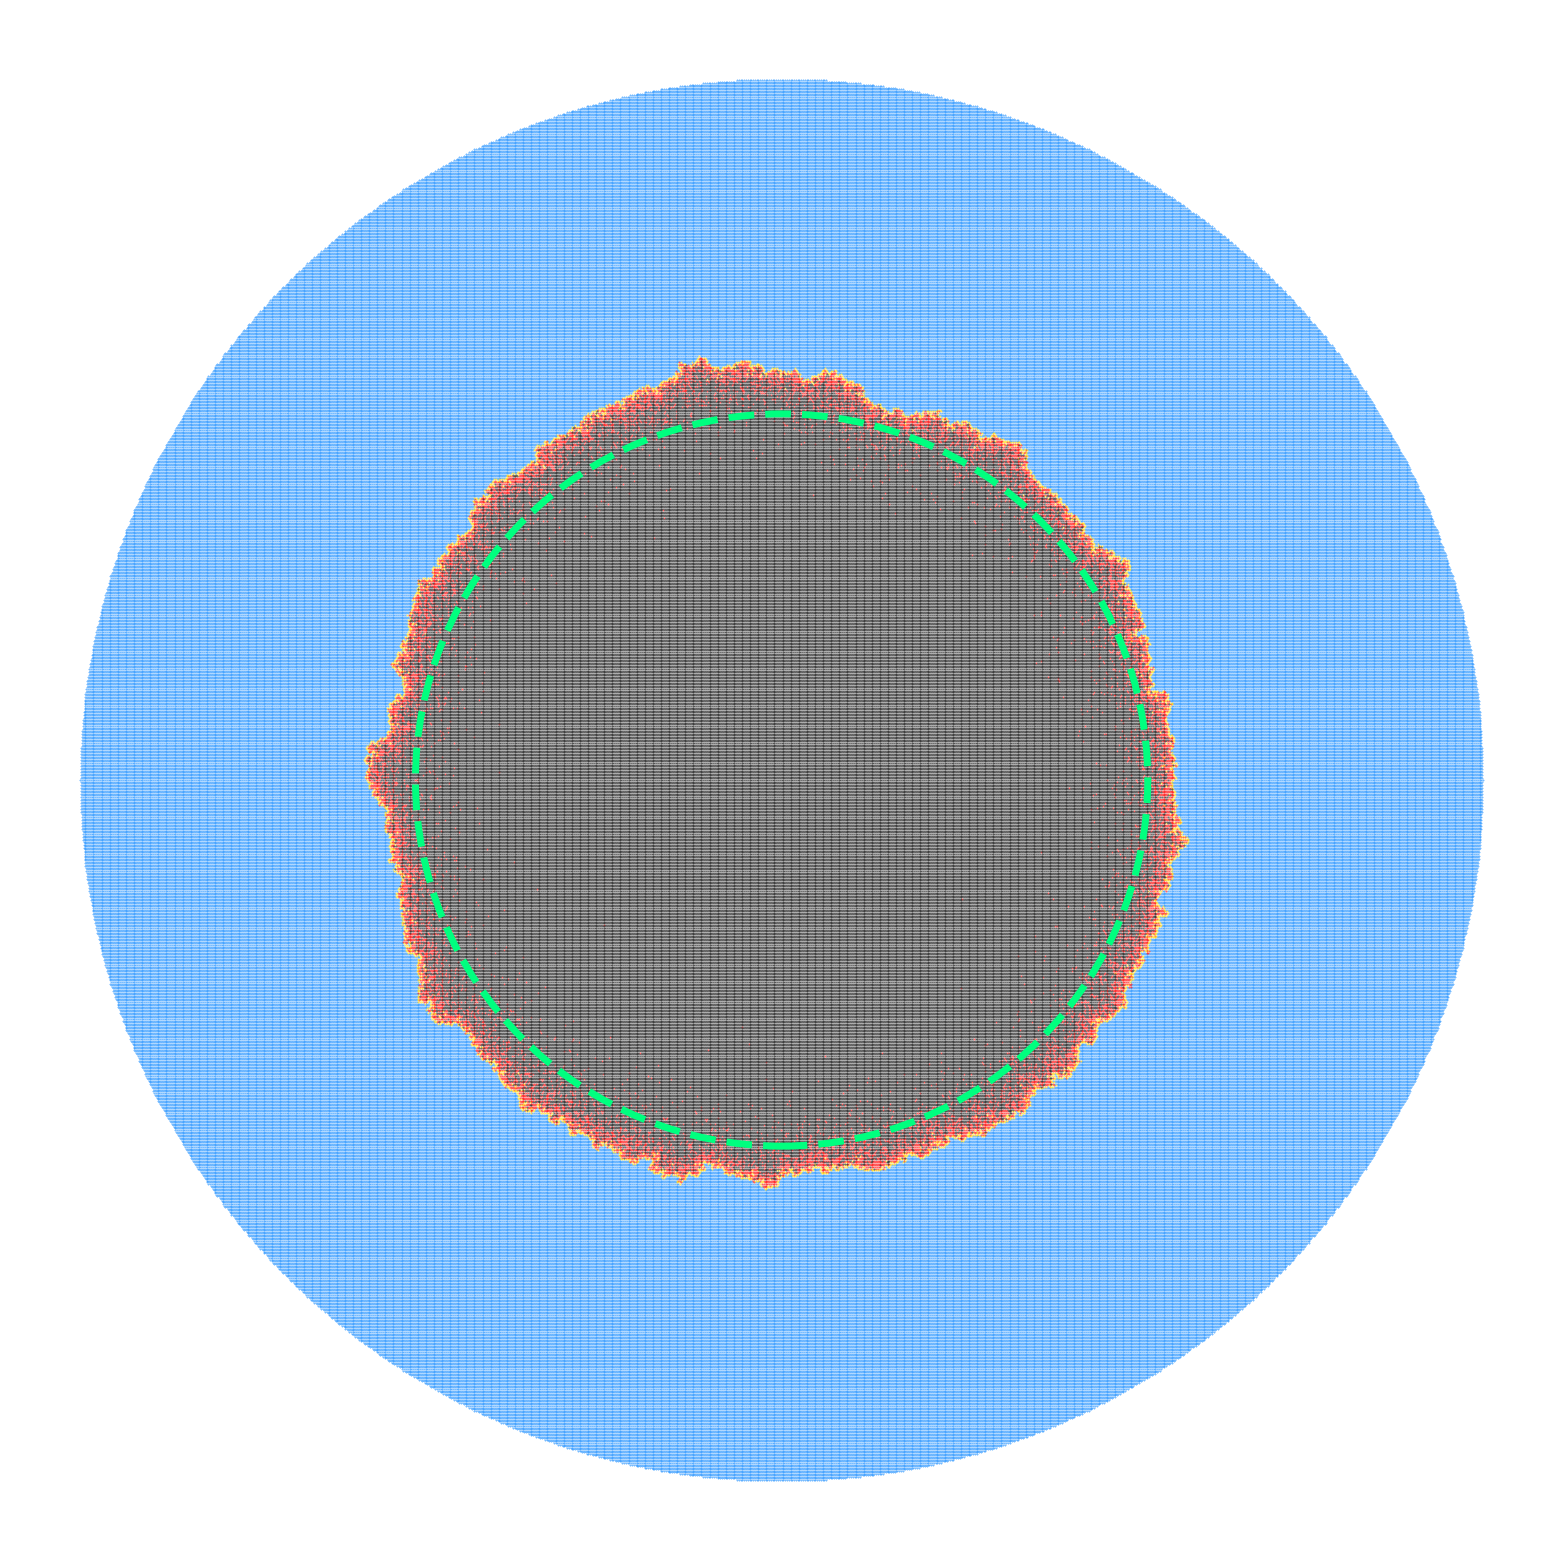

In [40]:

alpha = 1 * (24/(interval-1))# 초단위로 바꿔보자
# I -> D parameter 회복률 -> 몇일 지나면 더이상 바이러스 못 시키는지로 바꿔야됨
gamma = 1* 4.5/27 * (24/(interval-1)) # 27시간으로 가정했으면
num_steps = interval*4-3


h=950
w = 2*h
center = (((w+1)//2)//2,(h+1)//2)
center_pos = H.nodes[center]['pos']

# 이거 순서도 생각해야됨
for t in range(num_steps):

    # S -> E process
    new_exposed = set()
    new_recoveries = set()

    for i in random.choices(list(I), k=len(I)):
        # s의 이웃들에 대해서
        # 6n 보다
        # link based로 물어보는게 더 좋다
        # S I 연결되어 있는 link만 확인하자

        for neighbor in H.neighbors(i):
            # neighbor에서 E 혹은 I가 있으면 감염시켜라 그러면 E 빼야되는거 아닌가? 이건 고민좀 해봐야될 듯?
            # if neighbor in I or neighbor in E:
            if neighbor in S:
                #if np.random.choice([0,1], 1, p = [1-beta, beta]):
                if np.random.uniform() < beta:
                    new_exposed.add(neighbor)
                    # break 들어가는 이유 그 다음 스텝 추가 했으면 그건 다시 감염 안시켜서 한번에 하나만 감염시킬 수 있게 해주기 위해서 들어감
                    # 한step에 빨간 녀석은 한명만 감염시킬 수 있음.
                    # break 없앰

    # E -> I process
    new_infections = set()

    for e in E:
        # if np.random.choice([0,1], 1, p = [1-alpha, alpha]):
        if np.random.uniform() < alpha: 
            new_infections.add(e)
    # I -> D processs
    for ii in I:
        if np.random.uniform() < gamma:
            new_recoveries.add(ii)

    I -= new_recoveries
    D |= new_recoveries        
    E -= new_infections
    I |= new_infections
    S -= new_exposed
    E |= new_exposed



    if t in label_pos:
        fig, ax = plt.subplots(figsize=(20,20))
        circle =plt.Circle( center_pos ,radius_cal(len(D))/0.008 ,fill = False ,linewidth=5, linestyle='--',color='springgreen')
        # xy축 비율 동일하게 해주는코드
        ax.set_aspect('equal')
        # 상하좌우 테두리 없애주는 코드
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

        fig.patch.set_visible(False)
        ax.add_patch(circle)
        nx.draw_networkx_nodes(H, pos, nodelist=S, node_size=0.1, node_color='dodgerblue',node_shape='h')  
        nx.draw_networkx_nodes(H, pos, nodelist=I, node_size=0.1, node_color='red',node_shape='h')
        nx.draw_networkx_nodes(H, pos, nodelist=E, node_size=0.1, node_color='gold',node_shape='h')
        nx.draw_networkx_nodes(H, pos, nodelist=D, node_size=0.1, node_color='#131313',node_shape='h')
        circle.set_zorder(4) 

In [ ]:
# Multi seed  video make section

import cv2
import os
from natsort import natsorted

# Directory containing the PNG files
png_directory = "../result/cell_figure/merge_all/"

# Output video file name
output_file = "../result/video_in.mp4"

# Frame rate (number of frames per second)
frame_rate = 30


# Get the list of PNG files in the directory
png_files = natsorted([file for file in os.listdir(png_directory) if file.endswith(".png")])

# Get the first PNG file to read its dimensions
first_file_path = os.path.join(png_directory, png_files[0])
frame = cv2.imread(first_file_path)
height, width, _ = frame.shape

# Create a video writer object
fourcc = cv2.VideoWriter_fourcc(*"mp4v")  # Codec for the video file
video_writer = cv2.VideoWriter(output_file, fourcc, frame_rate, (width, height))

# Iterate over PNG files and write frames to the video
for png_file in png_files:
    file_path = os.path.join(png_directory, png_file)
    frame = cv2.imread(file_path)
    video_writer.write(frame)

# Release the video writer
video_writer.release()

In [ ]:
temp_dict = {'2NPC1':0.25, 'D502E':0.2, 'D508N':0.11, 'P424A':0.06, 'S425L':0.07, 'Y420S':0.22}
base_value = temp_dict['2NPC1']
normalized_dict = {key: value / base_value for key, value in temp_dict.items()}

print(normalized_dict)

{'2NPC1': 1.0, 'D502E': 0.8, 'D508N': 0.44, 'P424A': 0.24, 'S425L': 0.28, 'Y420S': 0.88}


# Radius / Day Figure

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


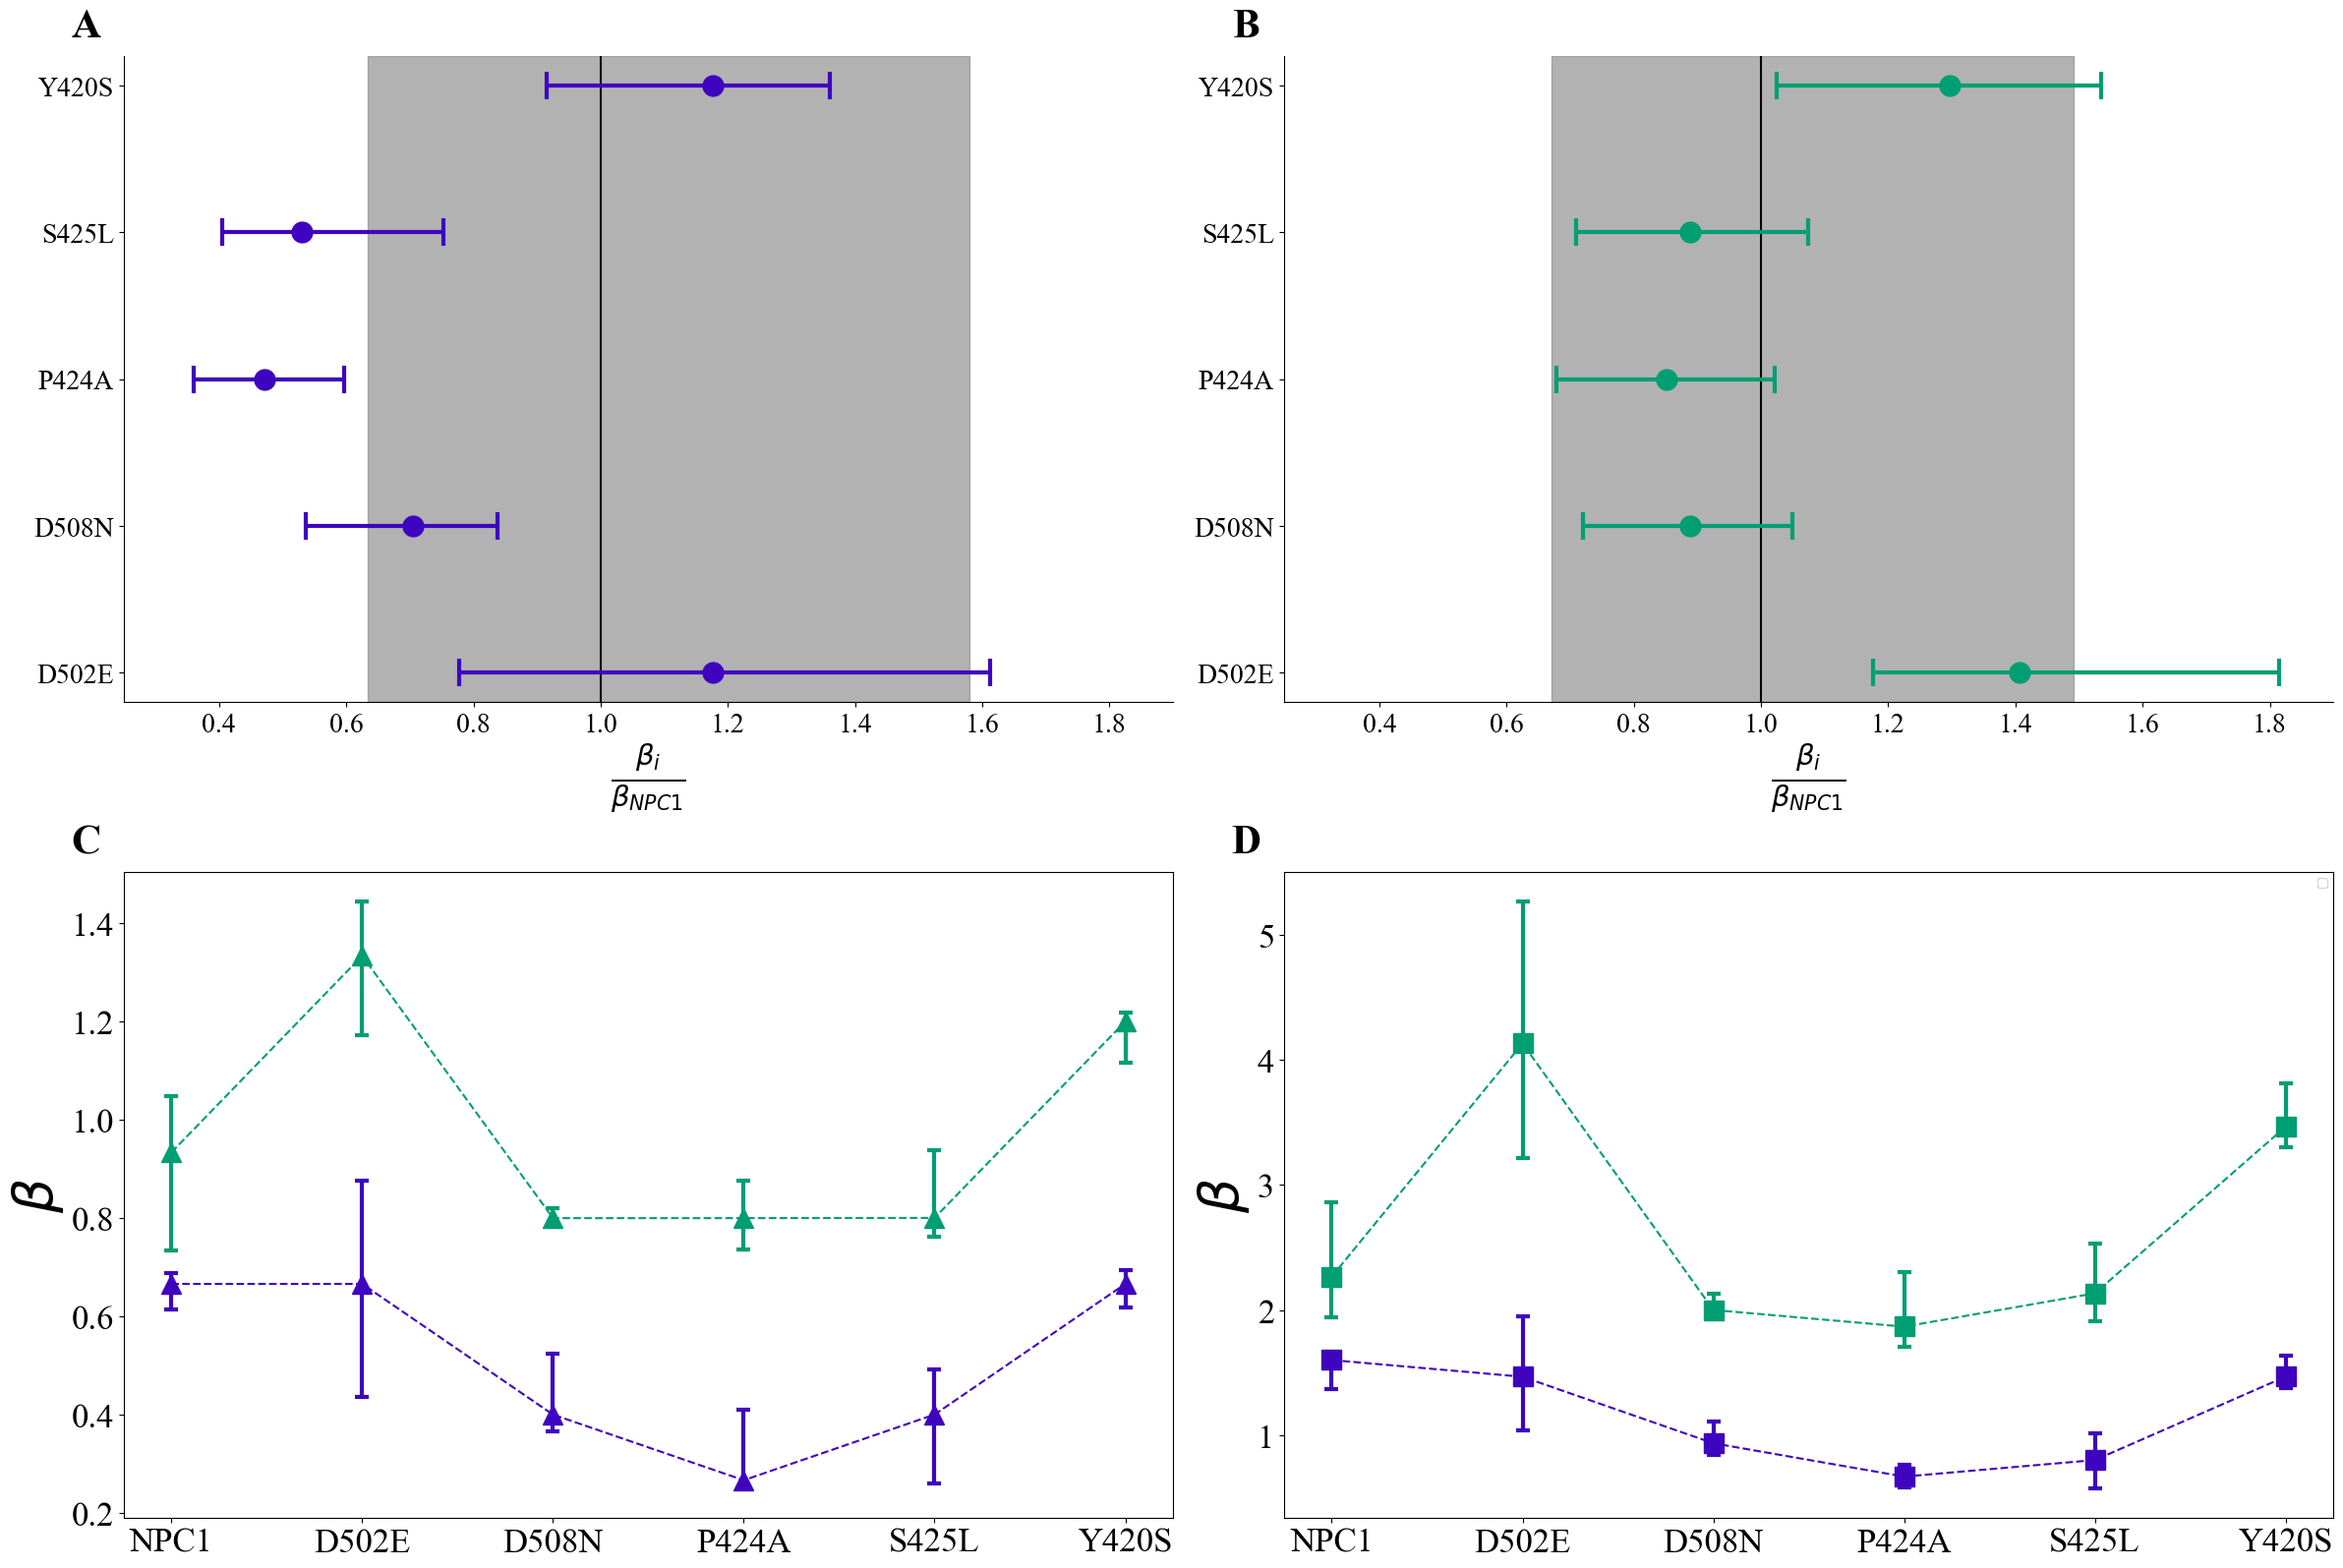

In [2]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import natsort
import os
from glob import glob
import string

plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 9,
    "axes.titlesize": 9,
    "axes.labelsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "legend.fontsize": 9,
})
def process_files(filelist):
    """
    파일을 처리하여 beta 값을 계산하고, 데이터프레임으로 반환하는 함수

    Parameters:
    - filelist: 처리할 파일 리스트

    Returns:
    - beta_df: 처리된 데이터를 담은 DataFrame
    """
    file_sorted = natsort.natsorted(filelist)
    beta_df = pd.DataFrame()

    for filepath in file_sorted:
        df = pd.read_csv(filepath)

        # 파일명에서 필요한 부분 추출 (예: Zaire 또는 Angola)
        file_name_part = filepath.split('_')[4]

        # 에러 컬럼 이름 필터링
        name_list = [col for col in df.columns if 'error' in col]

        # y의 평균과 표준편차 계산
        y_mean = df[name_list].mean(axis=1)
        y_err = df[name_list].std(axis=1)

        # 보간 및 새로운 x와 y 생성
        x = df['beta'].values
        y = y_mean.values
        f_linear = interp1d(x, y, kind='linear')
        x_new = np.linspace(x.min(), x.max(), int((x.max() - x.min()) * 10000))
        y_linear = f_linear(x_new)

        # 최소값 및 1.2배 범위 내 최대값 계산
        min_y_linear = np.min(y_linear)
        min_y_linear_1_2 = min_y_linear * 1.2

        beta_min_index = np.argmin(y_linear)
        beta_min = x_new[beta_min_index]

        beta_max_index = np.max(np.where(y_linear <= min_y_linear_1_2)[0])
        beta_min1_index = np.min(np.where(y_linear <= min_y_linear_1_2)[0])

        # beta_df에 결과 저장
        beta_df[file_name_part] = [
            x_new[beta_min1_index],
            beta_min,
            x_new[beta_max_index]
        ]

    beta_df.index = ['min', 'average', 'max']
    return beta_df

def cal_beta(interval: int, beta_probability: float, multiplier=1):
    return beta_probability * interval/ 24 / 4.5  / multiplier

# 파일 경로 설정
zaire_filelist = glob('/Users/juseongkim/Documents/filovirus/filovirus_ABM/error_raw_radii/Zaire*.csv')
angola_filelist = glob('/Users/juseongkim/Documents/filovirus/filovirus_ABM/error_raw_radii/Angola*.csv')

# Zaire와 Angola 데이터 처리
beta_zaire = process_files(zaire_filelist)
beta_angola = process_files(angola_filelist)

# Error bars 계산
lower_e = beta_zaire.loc['average'] - beta_zaire.loc['min']
upper_e = beta_zaire.loc['max'] - beta_zaire.loc['average']

lower_m = beta_angola.loc['average'] - beta_angola.loc['min']
upper_m = beta_angola.loc['max'] - beta_angola.loc['average']

upper_e_t = (beta_zaire.loc['max'] / beta_zaire.loc['average', '2NPC1']).values[1:] - beta_zaire.loc['average'].values[1:] / beta_zaire.loc['average', '2NPC1']
lower_e_t = beta_zaire.loc['average'].values[1:] / beta_zaire.loc['average', '2NPC1'] - (beta_zaire.loc['min'] / beta_zaire.loc['average', '2NPC1']).values[1:]

# 두 번째 그래프: beta_angola
upper_m_t = (beta_angola.loc['max'] / beta_angola.loc['average', '2NPC1']).values[1:] - beta_angola.loc['average'].values[1:] / beta_angola.loc['average', '2NPC1']
lower_m_t = beta_angola.loc['average'].values[1:] / beta_angola.loc['average', '2NPC1'] - (beta_angola.loc['min'] / beta_angola.loc['average', '2NPC1']).values[1:]



x_vals = (beta_zaire.loc['average'] / beta_zaire.loc['average', '2NPC1']).drop('2NPC1')
y_labels = x_vals.index  # 이제 순서도 정확함
upper = (beta_zaire.loc['max'] / beta_zaire.loc['average', '2NPC1']).drop('2NPC1') - x_vals
lower = x_vals - (beta_zaire.loc['min'] / beta_zaire.loc['average', '2NPC1']).drop('2NPC1')

# 2x2 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(24, 16))

# 각 subplot에 대한 접근
ax1, ax2, ax3, ax4 = axes.flatten()


# 첫 번째 서브플롯
ax1.vlines(1, -1, 5, colors='black')
ax1.axvspan(beta_zaire['2NPC1'].loc['min']/ beta_zaire['2NPC1'].loc['max'] , beta_zaire['2NPC1'].loc['max']/ beta_zaire['2NPC1'].loc['min'], alpha=0.6, color='gray')

ax1.errorbar(x_vals, y_labels,
             xerr=[lower, upper], fmt='o', capsize=10, markersize=15, color='#3F04BF', capthick=3, elinewidth=3)
ax1.set_xlabel(r'$\frac{\beta_i}{\beta_{NPC1}}$', fontsize=30)
ax1.tick_params('x', labelsize=20)
ax1.tick_params('y', labelsize=20)
ax1.set_xlim(0.25,1.9)
ax1.text(-.05, 1.03, f'{string.ascii_uppercase[0]}', transform=ax1.transAxes, size=30, weight='bold')

# for i, (x, y) in enumerate(zip(beta_zaire.iloc[1, 1:].index, beta_zaire.loc['average'].values[1:] / beta_zaire.loc['average', '2NPC1'])):
#     ax1.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(20, 15), ha='center', fontsize=15, color='black')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
# ax1.text(-0.1, 1.05, 'A', transform=ax1.transAxes, fontsize=30, fontweight='bold', va='top', ha='right',fontdict={'family': 'Helvetica'})



# 두 번째 서브플롯
ax2.vlines(1, -1, 5, colors='black')
ax2.errorbar(beta_angola.loc['average'].values[1:] / beta_angola.loc['average', '2NPC1'], beta_angola.iloc[1, 1:].index, 
             xerr=[lower_m_t, upper_m_t], fmt='o', capsize=10, markersize=15, color='#009E73', capthick=3, elinewidth=3)
ax2.axvspan(beta_angola['2NPC1'].loc['min']/ beta_angola['2NPC1'].loc['max'] , beta_angola['2NPC1'].loc['max']/ beta_angola['2NPC1'].loc['min'], alpha=0.6, color='gray')

ax2.set_xlabel(r'$\frac{\beta_i}{\beta_{NPC1}}$', fontsize=30)
ax2.tick_params('x', labelsize=20)
ax2.set_xlim(0.25,1.9)
ax2.tick_params('y', labelsize=20)
ax2.text(-.05, 1.03, f'{string.ascii_uppercase[1]}', transform=ax2.transAxes, size=30, weight='bold')

# for i, (x, y) in enumerate(zip(beta_angola.iloc[1, 1:].index, beta_angola.loc['average'].values[1:] / beta_angola.loc['average', '2NPC1'])):
#     ax2.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(20, 10), ha='center', fontsize=15, color='black')

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
# ax2.text(-0.1, 1.05, 'B', transform=ax2.transAxes, fontsize=30, fontweight='bold', va='top', ha='right',fontdict={'family': 'Helvetica'})

# 두 개의 subplot 생성
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))

# 아래 두개 그릴때

def df_describe(filelist):
    file_sorted = natsort.natsorted(filelist)
    beta = pd.DataFrame()

    for i in file_sorted:
        df = pd.read_csv(i) 
        name_list = []
        
        # 'error'가 들어간 열 이름을 추출
        for j in df:
            if 'error' in j:
                name_list.append(j)

        # 'error' 열들의 평균과 표준편차 계산
        y_mean = df[name_list].mean(axis=1)
        y_err = df[name_list].std(axis=1)

        x= df['beta'].values
        y = y_mean.values
        f_linear = interp1d(x,y,kind='linear')
        x_new = np.linspace(x.min(), x.max(),int((x.max()-x.min())*10000))
        y_linear = f_linear(x_new)
        
        # beta_zaire 계산
        min_y_linear = np.min(y_linear)
        min_y_linear_1_2 = min_y_linear * 1.2

        # 최소값 근처의 x_new 값 찾기
        beta_min_index = np.argmin(y_linear)
        beta_min = x_new[beta_min_index]

        # 최소값의 1.2배 이하의 최대값 인덱스 찾기
        beta_max_index = np.max(np.where(y_linear <= min_y_linear_1_2)[0])
        beta_min1_index = np.min(np.where(y_linear <= min_y_linear_1_2)[0])

        # 최소값 근처의 x_new 값 설정
        beta[i.split('_')[3]] = [
            x_new[beta_min1_index],
            beta_min,
            x_new[beta_max_index]
        ]
    beta.index = ['min', 'average', 'max']
    return beta

# 파일 경로 리스트
Zaire_R = glob('/Users/juseongkim/Documents/filovirus/filovirus_ABM/final_esemble/Rectangle/Zaire*.csv')
Zaire_T = glob('/Users/juseongkim/Documents/filovirus/filovirus_ABM/final_esemble/Triangle/Zaire*.csv')
Angola_R = glob('/Users/juseongkim/Documents/filovirus/filovirus_ABM/final_esemble/Rectangle/Angola*.csv')
Angola_T = glob('/Users/juseongkim/Documents/filovirus/filovirus_ABM/final_esemble/Triangle/Angola*.csv')

# 각 파일 리스트에 대해 df_describe 함수를 실행
beta_zaire = df_describe(Zaire_T)
beta_zaire_r = df_describe(Zaire_R)
beta_angola = df_describe(Angola_T)
beta_angola_r = df_describe(Angola_R)

# cal_beta 함수 호출 예시
beta_zaire_rec = cal_beta(1440, beta_zaire_r)
beta_zaire_tri = cal_beta(1440, beta_zaire)
beta_angola_rec = cal_beta(1440, beta_angola_r)
beta_angola_tri = cal_beta(1440, beta_angola)
x_positions = list(range(6))


# 첫 번째 subplot - Zaire 데이터
ax3.errorbar(list(beta_zaire_tri.columns), beta_zaire_tri.loc['average'],
             yerr=[beta_zaire_tri.loc['average'] - beta_zaire_tri.loc['min'],
                   beta_zaire_tri.loc['max'] - beta_zaire_tri.loc['average']],
             fmt='^', linestyle='--', markersize=15, capsize=5, capthick=3, elinewidth=3, color='#3F04BF', alpha=1, label=rf'VSV\Delta G-EBOV')

ax3.errorbar(list(beta_angola_tri.columns), beta_angola_tri.loc['average'],
             yerr=[beta_angola_tri.loc['average'] - beta_angola_tri.loc['min'],
                   beta_angola_tri.loc['max'] - beta_angola_tri.loc['average']],
             fmt='^', linestyle='--', markersize=15, capsize=5, capthick=3, elinewidth=3, color='#009E73', alpha=1, label=rf'VSV\Delta G-MARV') # #3F04BF 보라
# ax3.bar(x=list(beta_zaire_tri.columns),
#         height=beta_zaire_rec.loc['average'] - beta_zaire_tri.loc['average'],
#         bottom=beta_zaire_tri.loc['average'], color='#F0EBDE', alpha=1) #  #F1BBF2 분홍?
ax3.set_ylabel(rf'$\beta$', fontsize=40,fontname='Times New Roman')

# ax3.set_ylim(0, 1.5)
# ax3.tick_params(['NPC1','D502E', 'D508N', 'P424A','S425L','Y420S'], axis='x', labelsize=25)
ax3.set_xticks(x_positions)
ax3.set_xticklabels(['NPC1','D502E', 'D508N', 'P424A','S425L','Y420S'], fontsize=25)
ax3.tick_params(axis='y', labelsize=25)
ax3.text(-.05, 1.03, f'{string.ascii_uppercase[2]}', transform=ax3.transAxes, size=30, weight='bold')

# ax3.text(-0.1, 1.05, 'C', transform=ax3.transAxes, fontsize=40, fontweight='bold', va='top', ha='right',fontdict={'family': 'Helvetica'})


# 두 번째 subplot - Angola 데이터
ax4.errorbar(list(beta_zaire_rec.columns), beta_zaire_rec.loc['average'],
             yerr=[beta_zaire_rec.loc['average'] - beta_zaire_rec.loc['min'],
                   beta_zaire_rec.loc['max'] - beta_zaire_rec.loc['average']],
             fmt='s', linestyle='--', markersize=15, capsize=5, capthick=3, elinewidth=3, color='#3F04BF', alpha=1)

ax4.errorbar(list(beta_angola_rec.columns), beta_angola_rec.loc['average'],
             yerr=[beta_angola_rec.loc['average'] - beta_angola_rec.loc['min'],
                   beta_angola_rec.loc['max'] - beta_angola_rec.loc['average']],
             fmt='s', linestyle='--', markersize=15, capsize=5, capthick=3, elinewidth=3, color='#009E73', alpha=1)
# ax4.bar(x=list(beta_angola_tri.columns),
#         height=beta_angola_rec.loc['average'] - beta_angola_tri.loc['average'],
#         bottom=beta_angola_tri.loc['average'], color='#E69F00', alpha=0.5) # #009E73 청록색
ax4.set_ylabel(rf'$\beta$', fontsize=40)
# ax4.set_ylim(0, 3)
ax4.set_xticks(x_positions)
ax4.set_xticklabels(['NPC1','D502E', 'D508N', 'P424A','S425L','Y420S'], fontsize=25)
ax4.tick_params(axis='y', labelsize=25)
ax4.text(-.05, 1.03, f'{string.ascii_uppercase[3]}', transform=ax4.transAxes, size=30, weight='bold')

# ax4.text(-0.1, 1.05, 'D', transform=ax4.transAxes, fontsize=40, fontdict={'family': 'Helvetica'},fontweight='bold', va='top', ha='right',)

# Figure 전체 layout 조정
plt.tight_layout()
plt.legend()
# 결과 표시
plt.savefig('Fig3.png', format='png', dpi=300)
plt.show()


In [ ]:
import pandas as pd
from tqdm import tqdm 

snp_list = ['2NPC1', 'D502E', 'D508N', 'P424A', 'S425L', 'Y420S']
zaire_dict = {}
angola_dict = {}

for idx, s in tqdm(enumerate(snp_list)):
    print(f"Processing {s}...")

    row_idx = idx // 3
    col_idx = idx % 3

    beta_E = beta_list[row_idx][col_idx]
    beta_M = beta_list1[row_idx][col_idx]

    df_E = D_type('Zaire', s)
    df_M = D_type('Angola', s)
    r_list_E, sd_list_E = plaque_f(df_E)
    r_list_M, sd_list_M = plaque_f(df_M)

    H, pos = make_lattice()
    interval = 1441

    S,E,I,D = set_initial(H, r_list_E[0], beta_E, interval)
    _,_,dead_list_E = SEID_model(H, S,E,I,D, interval, beta_E)
    rad_list_E = radius_cal(np.array(dead_list_E))

    S1,E1,I1,D1 = set_initial(H, r_list_M[0], beta_M, interval)
    _,_,dead_list_M = SEID_model(H, S1,E1,I1,D1, interval, beta_M)
    
    rad_list_M = radius_cal(np.array(dead_list_M))

    # 결과 저장
    zaire_dict[s] = rad_list_E
    angola_dict[s] = rad_list_M

# DataFrame 변환 및 CSV 저장
zaire_df = pd.DataFrame(zaire_dict)
angola_df = pd.DataFrame(angola_dict)

zaire_df.to_csv("zaire_plaque_radius_results.csv", index=False)
angola_df.to_csv("angola_plaque_radius_results.csv", index=False)

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from natsort import natsorted

# ✅ "Order_and_Phase" 폴더 경로
current_path = os.getcwd()
# base_folder = os.path.join(current_path, "Order_and_Phase")

# ✅ "Order_and_Phase" 폴더 내에서 summary로 시작하는 CSV 파일 검색
summary_files = natsorted([
    file for file in os.listdir(current_path) if file.endswith("radius.csv")
])

summary_files
# # ✅ 빈 데이터프레임 생성 (Violin Plot을 위한 데이터 저장)
temp = pd.DataFrame()

# # ✅ 모든 summary 파일을 한 번에 처리하여 temp 생성
for file in summary_files:
    file_path = os.path.join(current_path, file)
    df = pd.read_csv(file_path)  # CSV 파일 읽기
    df = df.iloc[:,1:]
    # display(df)
    if file == 'NPC1_radius.csv':
        temp  = pd.concat([df,temp],axis=1)
        continue
    temp = pd.concat([temp,df], axis=1)
    
    # display(df)

display(temp)
temp.to_csv('filovirus_radius_sim.csv')

NPC1_Z    NPC1_A   D502E_Z   D502E_A   D508N_Z   D508N_A   P424A_Z  \
0     0.443315  0.468239  0.566505  0.392428  0.404673  0.497385  0.290820   
1     0.443964  0.468973  0.567070  0.393019  0.405423  0.498092  0.291397   
2     0.444450  0.469604  0.567775  0.393589  0.405916  0.498670  0.292137   
3     0.445098  0.470098  0.568338  0.394137  0.406428  0.499119  0.292629   
4     0.445762  0.470642  0.568859  0.394745  0.407038  0.499728  0.293312   
...        ...       ...       ...       ...       ...       ...       ...   
5756  2.114056  2.385218  2.230254  2.553241  1.740823  2.296380  1.388231   
5757  2.114328  2.385546  2.230562  2.553608  1.741030  2.296697  1.388392   
5758  2.114604  2.385905  2.230878  2.553962  1.741273  2.296961  1.388640   
5759  2.114850  2.386227  2.231079  2.554312  1.741498  2.297299  1.388812   
5760  2.115126  2.386619  2.231333  2.554691  1.741723  2.297564  1.388951   

       P424A_A   S425L_Z   S425L_A   Y420S_Z   Y420S_A  
0     0.514820  0.489359  0.452212  0.428131  0.507401  
1     0.515411  0.489849  0.452902  0.428654  0.507921  
2     0.516093  0.490518  0.453520  0.429251  0.508441  
3     0.516542  0.491121  0.454295  0.429791  0.508991  
4     0.517084  0.491577  0.454770  0.430330  0.509604  
...        ...       ...       ...       ...       ...  
5756  2.314255  1.839100  2.251485  2.099120  2.591753  
5757  2.314587  1.839339  2.251762  2.099383  2.592083  
5758  2.314849  1.839622  2.252046  2.099642  2.592423  
5759  2.315122  1.839830  2.252298  2.099890  2.592781  
5760  2.315406  1.840039  2.252529  2.100179  2.593083  

[5761 rows x 12 columns]

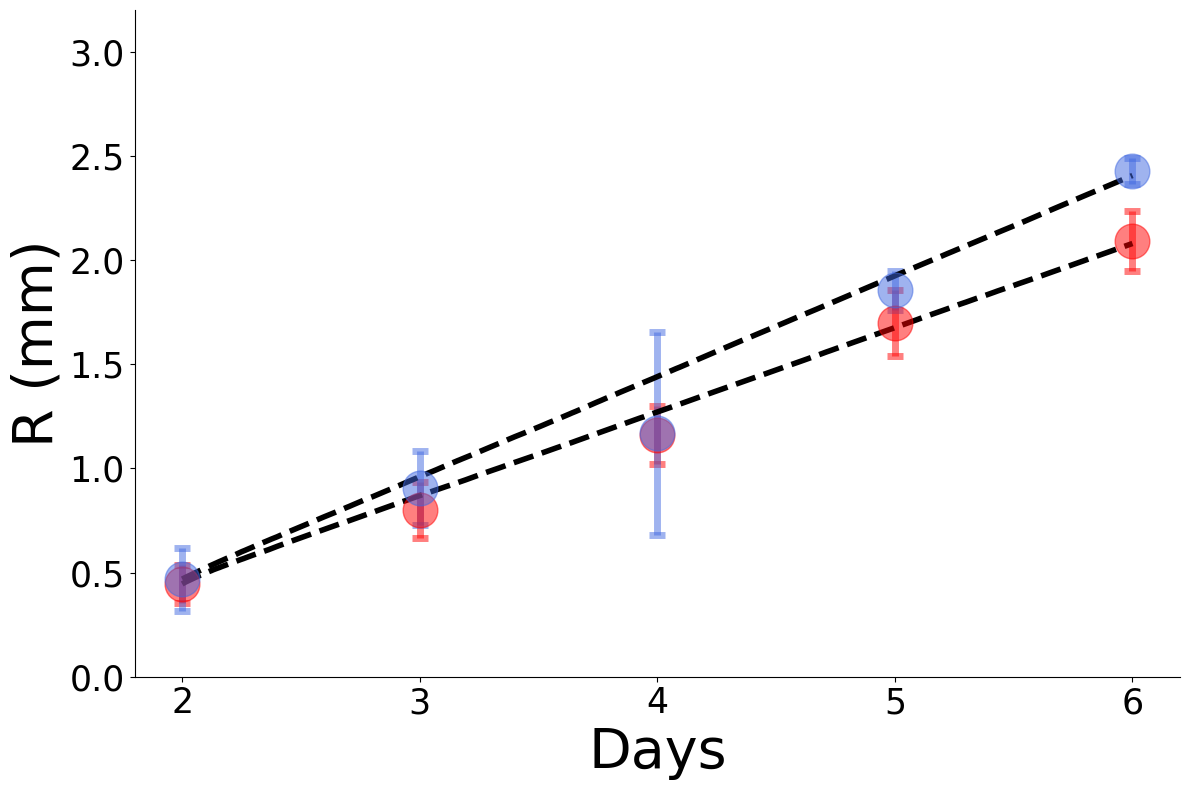

In [ ]:
from model import *
from utils import *
import matplotlib.pyplot as plt

s_type = '2NPC1'


df_E = D_type('Zaire', s_type)
df_M = D_type('Angola', s_type)
r_list_E, sd_list_E = plaque_f(df_E)
r_list_M, sd_list_M = plaque_f(df_M)

interval = 1441 # 근데 그거랑 상관없이 몇개로 나눌거냐는 똑같잖아?
ps = None # 기본값은 4일로 잡아놓고 필요에 따라서 더 늘려서 할 수 있도록 해보자
result = []
label_pos = []
if ps is not None:
    for i in np.arange(ps):
        if i == ps-1:
            temp = np.linspace(i,i+1, interval)
            result = np.concatenate((result,temp))
        else:
            temp = np.linspace(i,i+1, interval)[:-1]
            result = np.concatenate((result,temp))
    arr = result
    for i in range(1,ps+1):
        label_pos.append(interval*i-i)
else:
    a = np.linspace(0,1,interval)[:-1]
    b = np.linspace(1,2,interval)[:-1]
    c = np.linspace(2,3,interval)[:-1]
    d = np.linspace(3,4,interval)
    arr = np.concatenate((a, b,c,d))
    for i in range(1,5):
        label_pos.append(interval*i-i)


H, pos = make_lattice(lattice_type='triangle')

S1,E1,I1,D1 = set_initial(H, r_list_E[0], interval)
S2,E2,I2,D2 = set_initial(H, r_list_M[0], interval)

beta = 0.05
beta1 = 0.27

_, infected_list, dead_list = SEID_model(H, S1,E1,I1,D1, interval, beta)
_, infected_list1, dead_list1 = SEID_model(H, S2,E2,I2,D2, interval, beta1)

# 개수를 반지름으로 변환
rad_list = radius_cal(np.array(dead_list))
rad_list1 = radius_cal(np.array(dead_list1))

# 어떤 값이 제일 작냐?
plt.figure(figsize=(12,8))
#Ebola
# plt.scatter(np.arange(0,len(r_array_E),1),list(r_array_E), marker='o', color='red', alpha=0.5, s= 100) # Ebola
plt.errorbar(np.arange(0,len(r_list_E),1), r_list_E, yerr = sd_list_E, color='red', label=f'Ebola beta {beta}', fmt='o', alpha=0.5,linestyle='', capsize=6, markersize=25, capthick=5, elinewidth=5)
# Marburg
# plt.scatter(np.arange(0,len(r_array_M),1),list(r_array_M), marker='o', color='royalblue', alpha=0.5, s= 100, facecolor='none') # Marburg
plt.errorbar(np.arange(0,len(r_list_M),1), r_list_M, yerr = sd_list_M, color='royalblue',label=f'Marburg beta {beta1}', fmt='o', alpha=0.5, linestyle='', capsize=6, markersize=25, capthick=5, elinewidth=5)

plt.plot(arr, rad_list, linestyle='dashed',color='black',linewidth=4)
plt.plot(arr, rad_list1, linestyle='dashed', color='black',linewidth=4)
# plt.scatter([0],rad_list[0], marker='s',  color='black', s=70)
# plt.scatter([0],rad_list1[0], marker='s',  color='black', s=70)

# plt.scatter([1,2,3,4],rad_sca, marker='s',  color='black', s=70)
# plt.scatter([1,2,3,4],rad_sca1, marker='s',  color='black', s=70)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('Days', fontsize=40)
plt.ylabel('R (mm)',fontsize=40)
#plt.title(f'e_beta = {beta*ratio} and {x:.5f}')
# plt.legend()
plt.ylim(0,3.2)
plt.xticks(np.arange(0,len(r_list_E),1), [2,3,4,5,6], fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
# plt.savefig(f'../result/radius_fit/fit_{s_type}_both_E{beta}_M{beta1}_{l:.3f}_{v:.3f}_new.pdf',format='pdf', dpi=200)


# plt.errorbar(np.arange(0,len(r_list),1), r_list, yerr = sd_list, color='red', fmt='o', alpha=0.4,linestyle='', capsize=6, markersize=15, capthick=5, elinewidth=5)
# plt.plot(arr, rad_list, linestyle='dashed',color='black',linewidth=4)
# plt.title(f'interval: {interval-1}_beta:{beta}_Error:{error}', fontsize=20)
# plt.show()

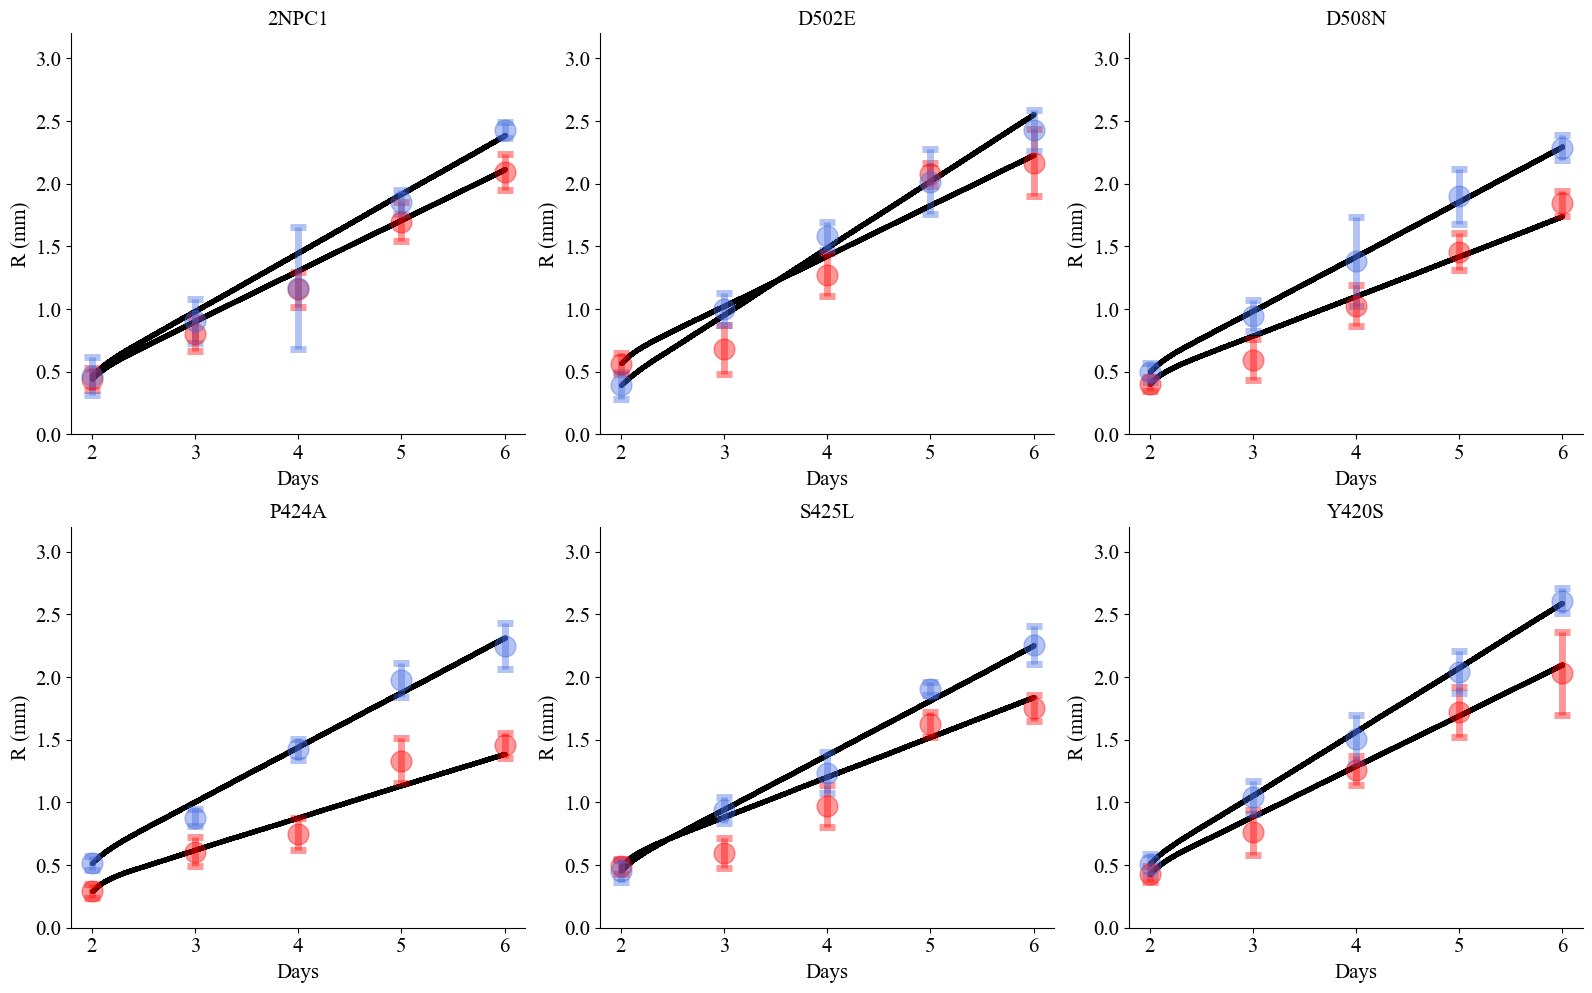

In [41]:
# 한번에 6개 다그리기

from model import *
from utils import *
import matplotlib.pyplot as plt
from tqdm import tqdm

snp_list = ['2NPC1', 'D502E', 'D508N', 'P424A', 'S425L', 'Y420S']

radi_df = pd.read_csv('./filovirus_radius_sim.csv')
radi_df = radi_df.iloc[:,1:]

# Create a 2x3 array of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

for idx, s in enumerate(snp_list):
    df_E = D_type('Zaire', s)
    df_M = D_type('Angola', s)
    r_list_E, sd_list_E = plaque_f(df_E)
    r_list_M, sd_list_M = plaque_f(df_M)

    # Calculate the current subplot index
    row_idx = idx // 3
    col_idx = idx % 3

    # # Plot on the current subplot
    axes[row_idx, col_idx].errorbar(np.arange(0, len(r_list_E), 1), r_list_E, yerr=sd_list_E, color='red',label='Ebola virus',
                                    fmt='o', alpha=0.4, linestyle='', capsize=6, markersize=15,capthick=5, elinewidth=5)
    axes[row_idx, col_idx].errorbar(np.arange(0, len(r_list_M), 1), r_list_M, yerr=sd_list_M, color='royalblue',label='Marburg virus',
                                    fmt='o', alpha=0.4, linestyle='', capsize=6, markersize=15,capthick=5, elinewidth=5)
    
    
    axes[row_idx, col_idx].scatter(np.linspace(0,4,len(radi_df)),radi_df.iloc[:,2*idx], color='black', s=5)
    axes[row_idx, col_idx].scatter(np.linspace(0,4,len(radi_df)),radi_df.iloc[:,2*idx+1], color='black', s=5)

    axes[row_idx, col_idx].spines['right'].set_visible(False)
    axes[row_idx, col_idx].spines['top'].set_visible(False)
    axes[row_idx, col_idx].set_xlabel('Days', fontsize=15)
    axes[row_idx, col_idx].set_ylabel('R (mm)', fontsize=15)
    axes[row_idx, col_idx].set_title(s, fontsize=15)
    axes[row_idx, col_idx].set_ylim(0, 3.2)
    axes[row_idx, col_idx].set_xticks(np.arange(0, len(r_list_E), 1))
    axes[row_idx, col_idx].set_xticklabels([2, 3, 4, 5, 6], fontsize=15)
    axes[row_idx, col_idx].tick_params(axis='y', labelsize=15)

# Show the plot
plt.tight_layout()
plt.show()

0.1699999999999999
[0.13193361 0.13203372 0.13213383 0.13223393 0.13233404 0.13243414
 0.13253425 0.13263435 0.13273446 0.13283456 0.13293467 0.13303477
 0.13313488 0.13323498 0.13333509 0.13343519 0.1335353  0.13363541
 0.13373551 0.13383562 0.13393572 0.13403583 0.13413593 0.13423604
 0.13433614 0.13443625 0.13453635 0.13463646 0.13473656 0.13483667
 0.13493678 0.13503688 0.13513699 0.13523709 0.1353372  0.1354373
 0.13553741 0.13563751 0.13573762 0.13583772 0.13593783 0.13603793
 0.13613804 0.13623815 0.13633825 0.13643836 0.13653846 0.13663857
 0.13673867 0.13683878 0.13693888 0.13703899 0.13713909 0.1372392
 0.1373393  0.13743941 0.13753952 0.13763962 0.13773973 0.13783983
 0.13793994 0.13804004 0.13814015 0.13824025 0.13834036 0.13844046
 0.13854057 0.13864067 0.13874078 0.13884089 0.13894099 0.1390411
 0.1391412  0.13924131 0.13934141 0.13944152 0.13954162 0.13964173
 0.13974183 0.13984194 0.13994204 0.14004215 0.14014226 0.14024236
 0.14034247 0.14044257 0.14054268 0.14064278 0

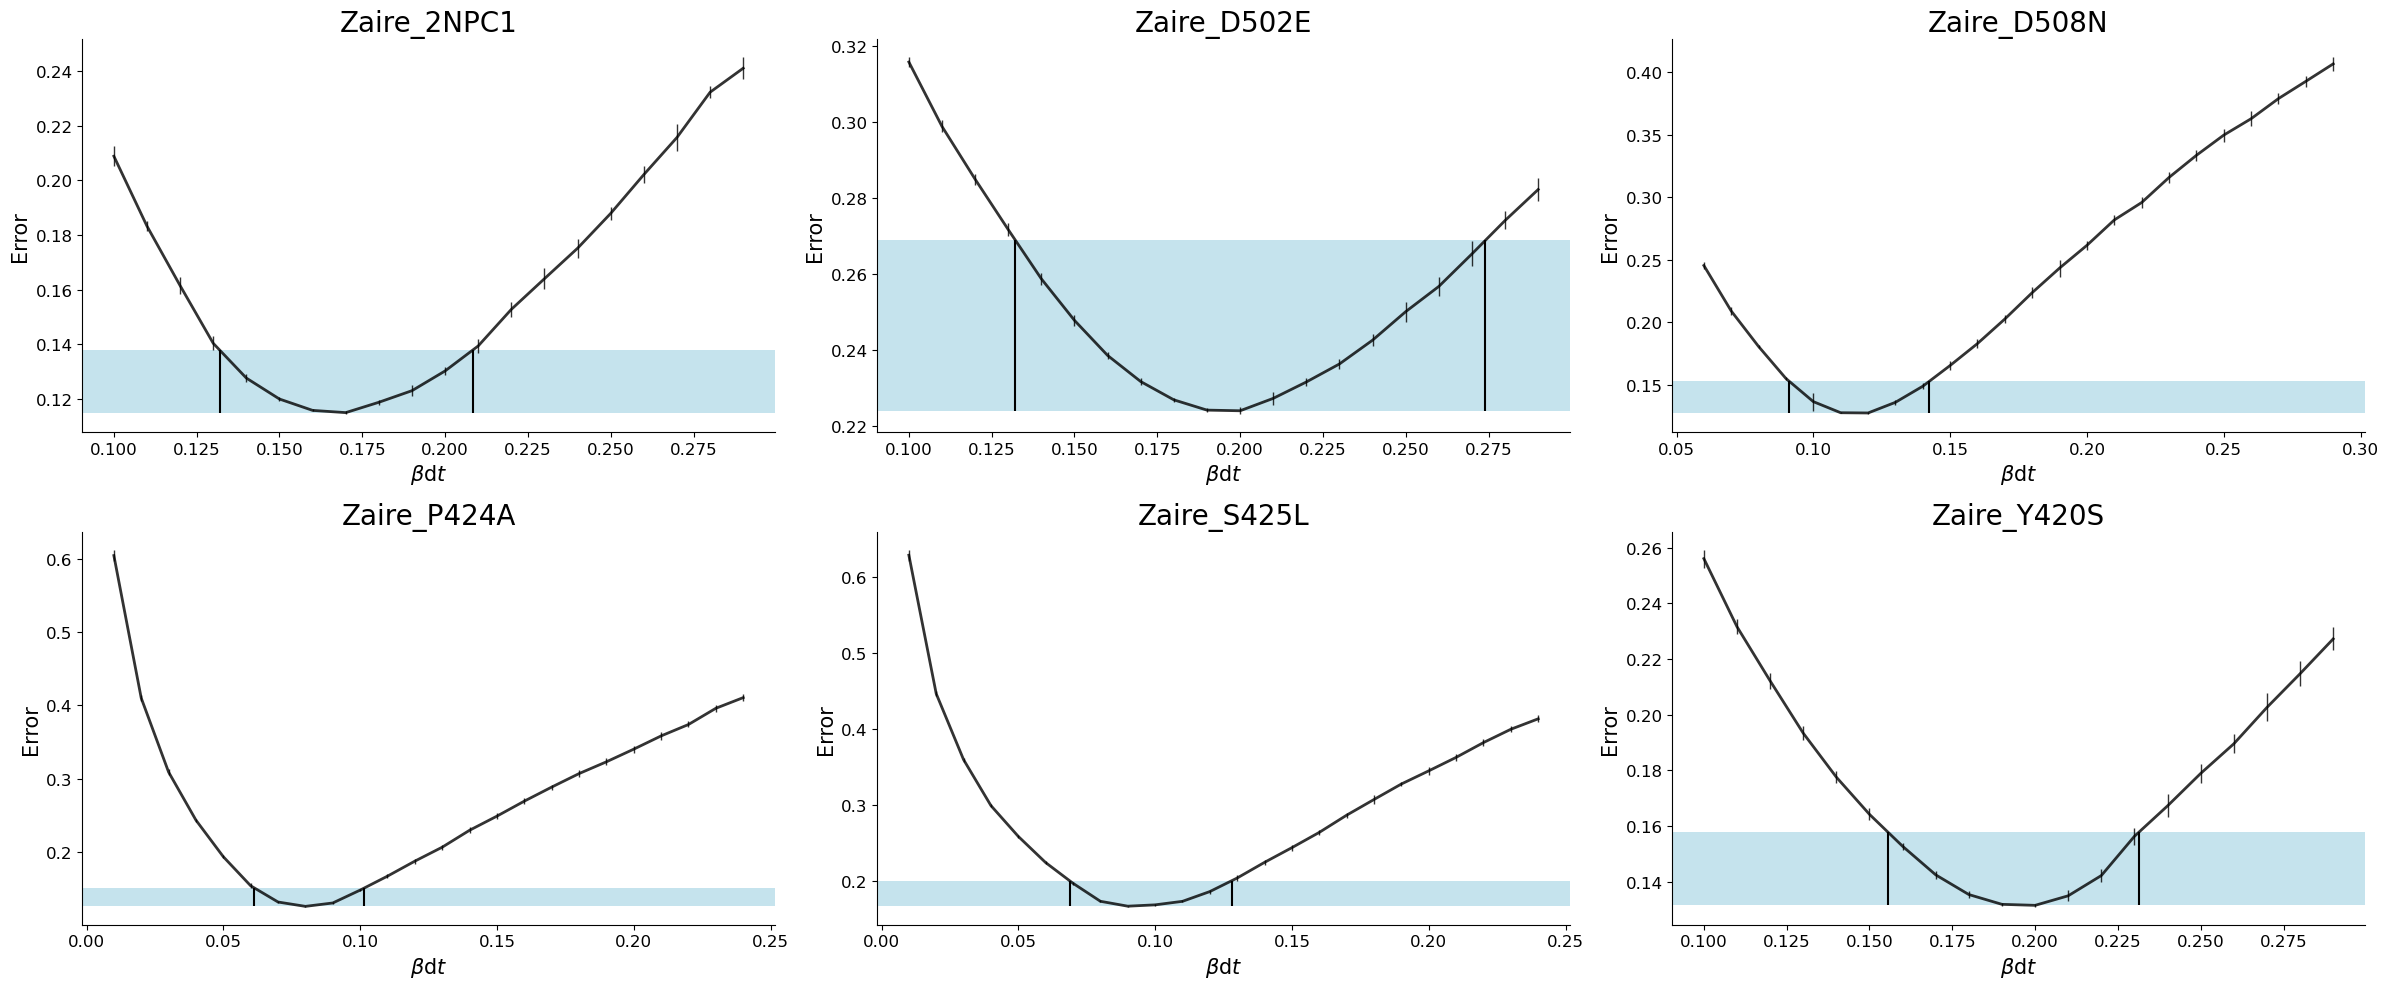

In [ ]:
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import natsort


filelist = glob('/Users/juseongkim/Documents/filovirus/filovirus_ABM/error_raw_radii/Zaire*.csv')

def find_indices_within_20_percent(data_list):
    # 최소값과 최소값의 인덱스를 찾습니다.
    min_value = min(data_list)
    min_index = np.argmin(data_list)

    # 최소값의 20% 계산
    threshold = min_value + 0.2 * min_value

    # 최소값의 20% 이내에 해당하는 값들의 인덱스를 추출하여 리스트에 저장
    indices_within_20_percent = [index for index, value in enumerate(data_list) if value <= threshold]

    return indices_within_20_percent

file_sorted = natsort.natsorted(filelist)

# subplot 크기 지정 (2x3)
fig, axs = plt.subplots(2, 3, figsize=(24, 10))
axs = axs.flatten()

# 그래프 그리기
for idx, i in enumerate(file_sorted):
    df = pd.read_csv(i) 
    name_list = []
    
    # 'error'가 들어가는 열의 이름을 추출
    for j in df:
        if 'error' in j:
            name_list.append(j)

    # y축 값 계산 (평균과 표준편차)
    y_mean = df[name_list].mean(axis=1)
    y_err = df[name_list].std(axis=1)   
    x = df['beta'].values
    y = y_mean.values
    
    # 선형 보간
    f_linear = interp1d(x, y, kind='linear')
    x_new = np.linspace(x.min(), x.max(), int((x.max() - x.min()) * 10000))
    y_linear = f_linear(x_new)
    
    # 그래프 그리기
    axs[idx].vlines(x_new[find_indices_within_20_percent(y_linear)].min(), y_mean.min()*1, y_mean.min()*1.2, color='black')
    axs[idx].vlines(x_new[find_indices_within_20_percent(y_linear)].max(), y_mean.min()*1, y_mean.min()*1.2, color='black')
    
    axs[idx].errorbar(df['beta'], y=y_mean, yerr=y_err, linewidth=2, color='black', alpha=0.8, elinewidth=1)
    axs[idx].axhspan(y_mean.min()*1, y_mean.min()*1.2, facecolor='lightblue', alpha=0.7)
    
    # 그래프 제목 및 레이블
    axs[idx].set_title(f'{i[68:79]}', fontsize=20)
    axs[idx].set_ylabel('Error', fontsize=15)
    axs[idx].set_xlabel(r'$\beta \mathrm{d}t$', fontsize=15)
    axs[idx].tick_params(labelsize=12)
    axs[idx].spines['right'].set_visible(False)
    axs[idx].spines['top'].set_visible(False)

    # 최소값의 beta 출력
    print(df['beta'][np.argmin(y_mean)])
    print(x_new[find_indices_within_20_percent(y_linear)])    

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.savefig('../Zaire_Error_function.pdf',format='pdf', dpi=100)


0.27
[0.21750729 0.21760734 0.21770738 ... 0.32415173 0.32425177 0.32435181]
0.38
[0.3177406  0.31784063 0.31794067 ... 0.48979993 0.48989997 0.49      ]
0.24
[0.19461115 0.19471118 0.1948112  0.19491123 0.19501125 0.19511128
 0.1952113  0.19531133 0.19541135 0.19551138 0.1956114  0.19571143
 0.19581145 0.19591148 0.1960115  0.19611153 0.19621155 0.19631158
 0.1964116  0.19651163 0.19661165 0.19671168 0.1968117  0.19691173
 0.19701175 0.19711178 0.1972118  0.19731183 0.19741185 0.19751188
 0.1976119  0.19771193 0.19781195 0.19791198 0.198012   0.19811203
 0.19821205 0.19831208 0.1984121  0.19851213 0.19861215 0.19871218
 0.1988122  0.19891223 0.19901225 0.19911228 0.1992123  0.19931233
 0.19941235 0.19951238 0.1996124  0.19971243 0.19981245 0.19991248
 0.2000125  0.20011253 0.20021255 0.20031258 0.2004126  0.20051263
 0.20061265 0.20071268 0.2008127  0.20091273 0.20101275 0.20111278
 0.2012128  0.20131283 0.20141285 0.20151288 0.2016129  0.20171293
 0.20181295 0.20191298 0.202013   0.2

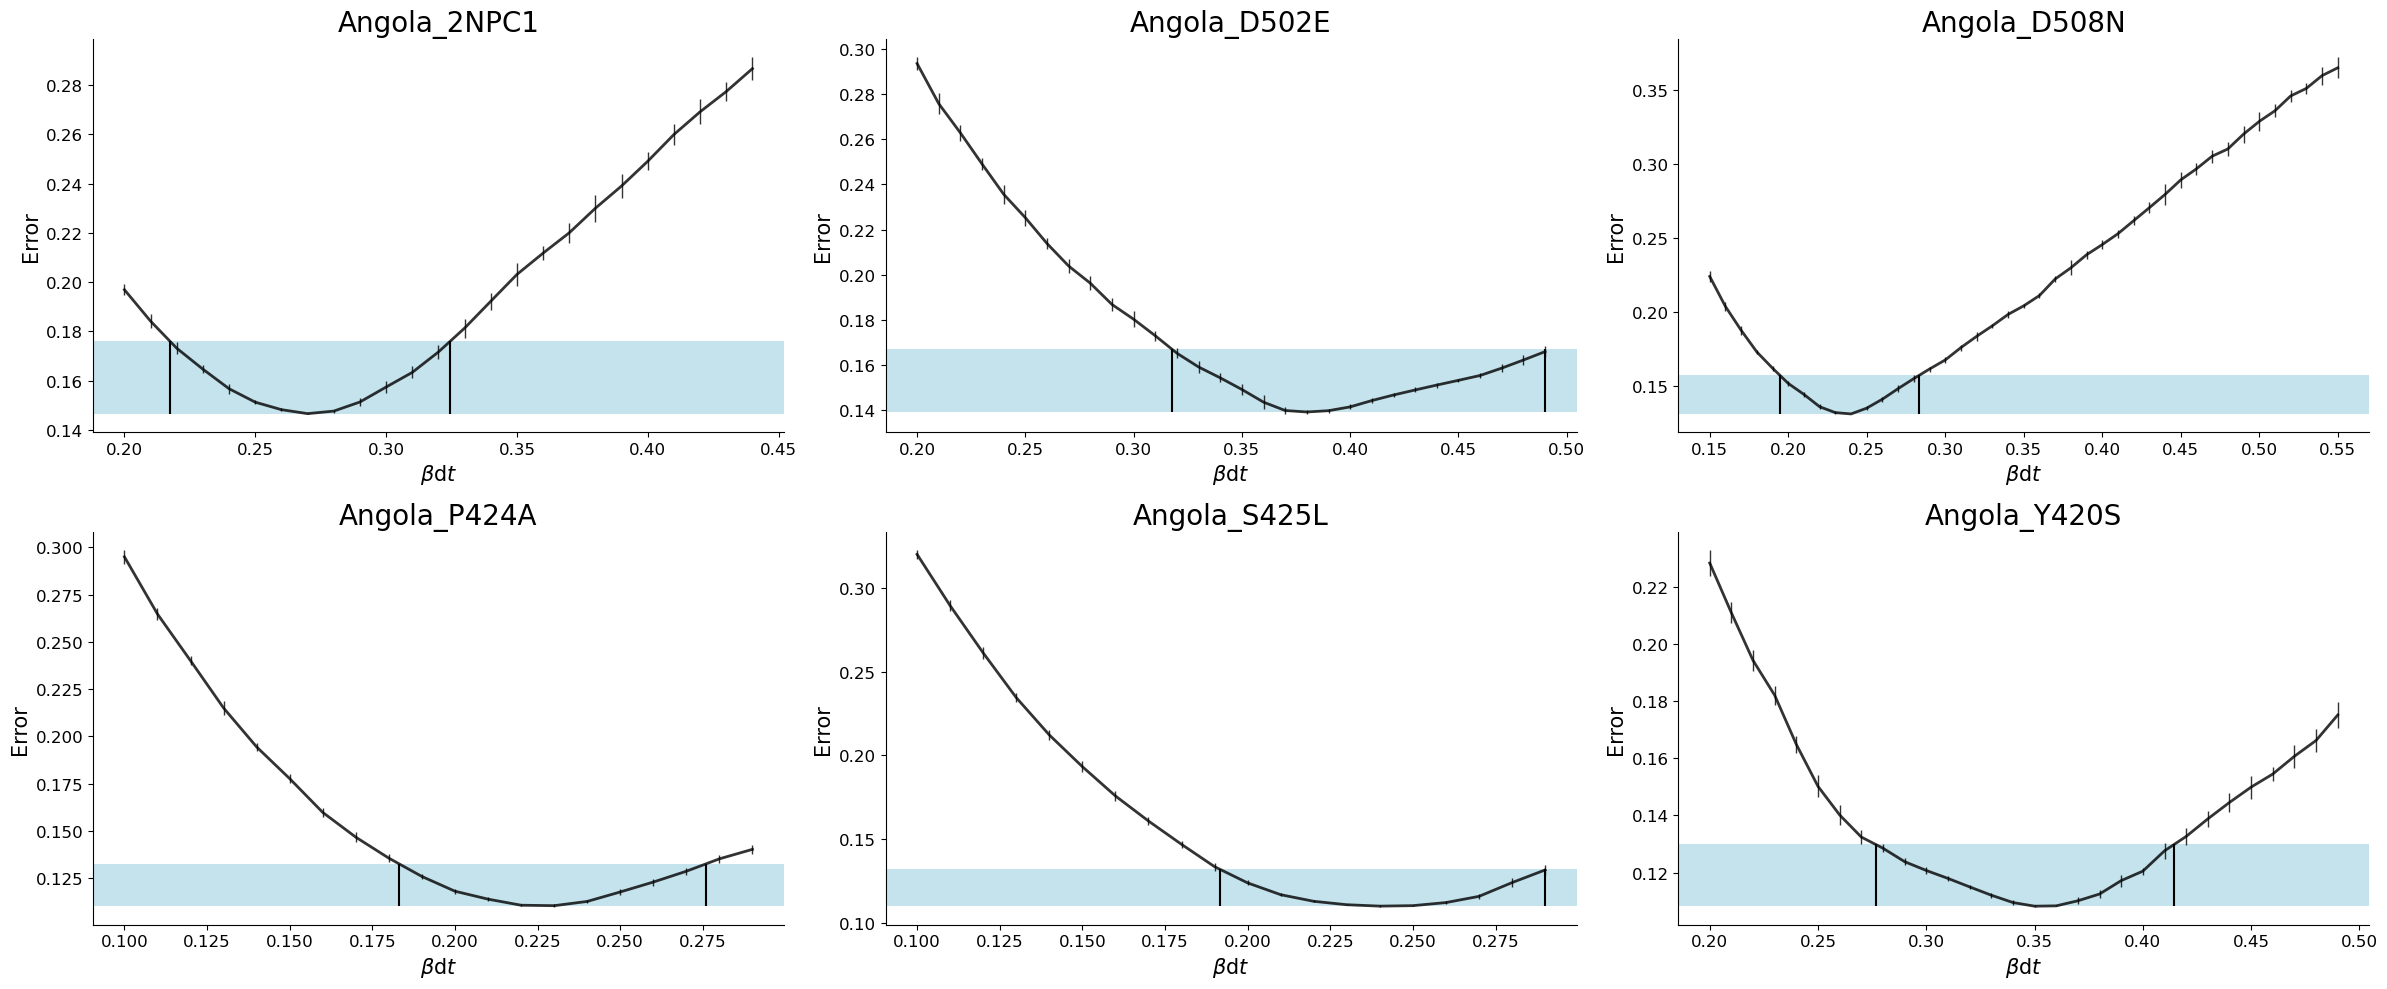

In [ ]:
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import natsort
from scipy.interpolate import interp1d

# 파일 리스트 불러오기
filelist = glob('/Users/juseongkim/Documents/filovirus/filovirus_ABM/error_raw_radii/Angola*.csv')
file_sorted = natsort.natsorted(filelist)

# subplot 크기 지정 (2x3)
fig, axs = plt.subplots(2, 3, figsize=(24, 10))
axs = axs.flatten()

# 그래프 그리기
for idx, i in enumerate(file_sorted):
    df = pd.read_csv(i) 
    name_list = []
    
    # 'error'가 들어가는 열의 이름을 추출
    for j in df:
        if 'error' in j:
            name_list.append(j)

    # y축 값 계산 (평균과 표준편차)
    y_mean = df[name_list].mean(axis=1)
    y_err = df[name_list].std(axis=1)   
    x = df['beta'].values
    y = y_mean.values
    
    # 선형 보간
    f_linear = interp1d(x, y, kind='linear')
    x_new = np.linspace(x.min(), x.max(), int((x.max() - x.min()) * 10000))
    y_linear = f_linear(x_new)
    
    # 그래프 그리기
    axs[idx].vlines(x_new[find_indices_within_20_percent(y_linear)].min(), y_mean.min()*1, y_mean.min()*1.2, color='black')
    axs[idx].vlines(x_new[find_indices_within_20_percent(y_linear)].max(), y_mean.min()*1, y_mean.min()*1.2, color='black')
    
    axs[idx].errorbar(df['beta'], y=y_mean, yerr=y_err, linewidth=2, color='black', alpha=0.8, elinewidth=1)
    axs[idx].axhspan(y_mean.min()*1, y_mean.min()*1.2, facecolor='lightblue', alpha=0.7)
    
    # 그래프 제목 및 레이블
    axs[idx].set_title(f'{i[68:80]}', fontsize=20)
    axs[idx].set_ylabel('Error', fontsize=15)
    axs[idx].set_xlabel(r'$\beta \mathrm{d}t$', fontsize=15)
    axs[idx].tick_params(labelsize=12)
    axs[idx].spines['right'].set_visible(False)
    axs[idx].spines['top'].set_visible(False)

    # 최소값의 beta 출력
    print(df['beta'][np.argmin(y_mean)])
    print(x_new[find_indices_within_20_percent(y_linear)])    

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.savefig('../Angola_Error_function.pdf',format='pdf', dpi=100)